In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from datetime import date

In [2]:
data = pd.read_csv('./B题-全部数据/order_train1.csv')
dtest = pd.read_csv('./B题-全部数据/predict_sku1.csv')


In [3]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3
...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59
597690,2018-12-20,102,21875,302,408,offline,762.0,502
597691,2018-12-20,102,20215,302,408,offline,2013.0,106
597692,2018-12-20,102,20195,302,408,offline,2120.0,187


In [4]:
dtest

,sales_region_code,item_code,first_cate_code,second_cate_code
0,101,20002,303,406
1,101,20003,301,405
2,101,20006,307,403
3,101,20011,303,401
4,101,20014,307,403
...,...,...,...,...
2614,105,22066,307,403
2615,105,22072,305,412
2616,105,22075,307,403
2617,105,22083,303,401


In [5]:
all_data = pd.merge(data, dtest)
all_data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-02,102,20323,305,412,offline,99.0,502
1,2015-09-03,102,20323,305,412,offline,88.0,56
2,2015-09-04,102,20323,305,412,offline,89.0,101
3,2015-09-05,102,20323,305,412,offline,101.0,53
4,2015-09-06,102,20323,305,412,offline,92.0,107
...,...,...,...,...,...,...,...,...
422335,2018-12-20,101,20627,307,403,online,580.0,18
422336,2018-12-20,101,21115,307,403,online,592.0,31
422337,2018-12-20,101,21432,308,404,online,1360.0,61
422338,2018-12-20,105,20994,302,408,offline,841.0,3


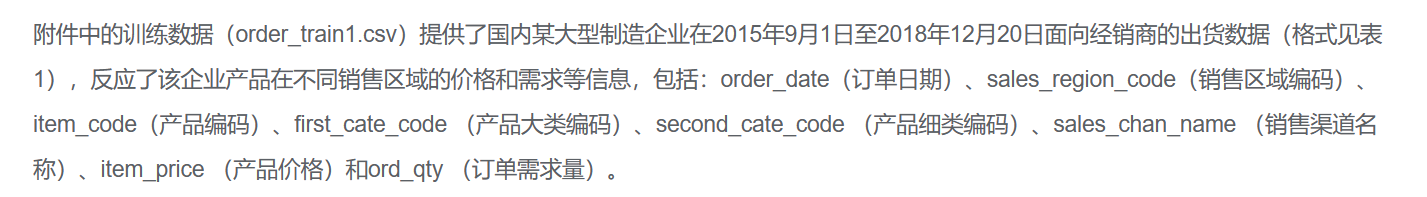

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         597694 non-null  object 
 1   sales_region_code  597694 non-null  int64  
 2   item_code          597694 non-null  int64  
 3   first_cate_code    597694 non-null  int64  
 4   second_cate_code   597694 non-null  int64  
 5   sales_chan_name    597694 non-null  object 
 6   item_price         597694 non-null  float64
 7   ord_qty            597694 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 36.5+ MB


In [7]:

# 销售区域---5类
data['sales_region_code'].unique()

array([104, 102, 101, 105, 103], dtype=int64)

In [8]:






# 产品大类--8类
data['first_cate_code'].unique()

array([307, 301, 308, 305, 303, 306, 302, 304], dtype=int64)

In [9]:
# 产品细类--12类
data['second_cate_code'].unique()

array([403, 405, 404, 412, 410, 401, 407, 408, 402, 409, 406, 411],
      dtype=int64)

In [10]:
# 销售渠道--2类
data['sales_chan_name'].unique()

array(['offline', 'online'], dtype=object)

In [11]:

dtest.isnull().sum()


sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
dtype: int64

In [12]:
data.isnull().sum()

order_date           0
sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
sales_chan_name      0
item_price           0
ord_qty              0
dtype: int64

In [13]:

# # 分割天(date)和小时(hour)
# data['year'] = data['order_date'].map(lambda x: x.split('/')[0])
# data['month'] = data['order_date'].map(lambda x: x.split('/')[1])
# data['day'] = data['order_date'].map(lambda x: x.split('/')[2])
# data.head()

In [14]:

data.dtypes

order_date            object
sales_region_code      int64
item_code              int64
first_cate_code        int64
second_cate_code       int64
sales_chan_name       object
item_price           float64
ord_qty                int64
dtype: object

In [15]:



# 对data中销售日期进行时间格式转换，coerce将无效解析设置为NaT
data.loc[:,'order_date'] = pd.to_datetime(data.loc[:,'order_date'].astype(str), format='%Y-%m-%d', errors='coerce')

In [16]:
# 根据销售日期列获取消费月份列
data['month'] = [x.month for x in data['order_date']]
data['year'] = [x.year for x in data['order_date']]
data['day'] = [x.day for x in data['order_date']]
# data.drop(['销售日期'], axis=1, inplace=True)
data.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,1
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,2
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,2
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,2


Text(0.5, 1.0, '每年的产品需求量')

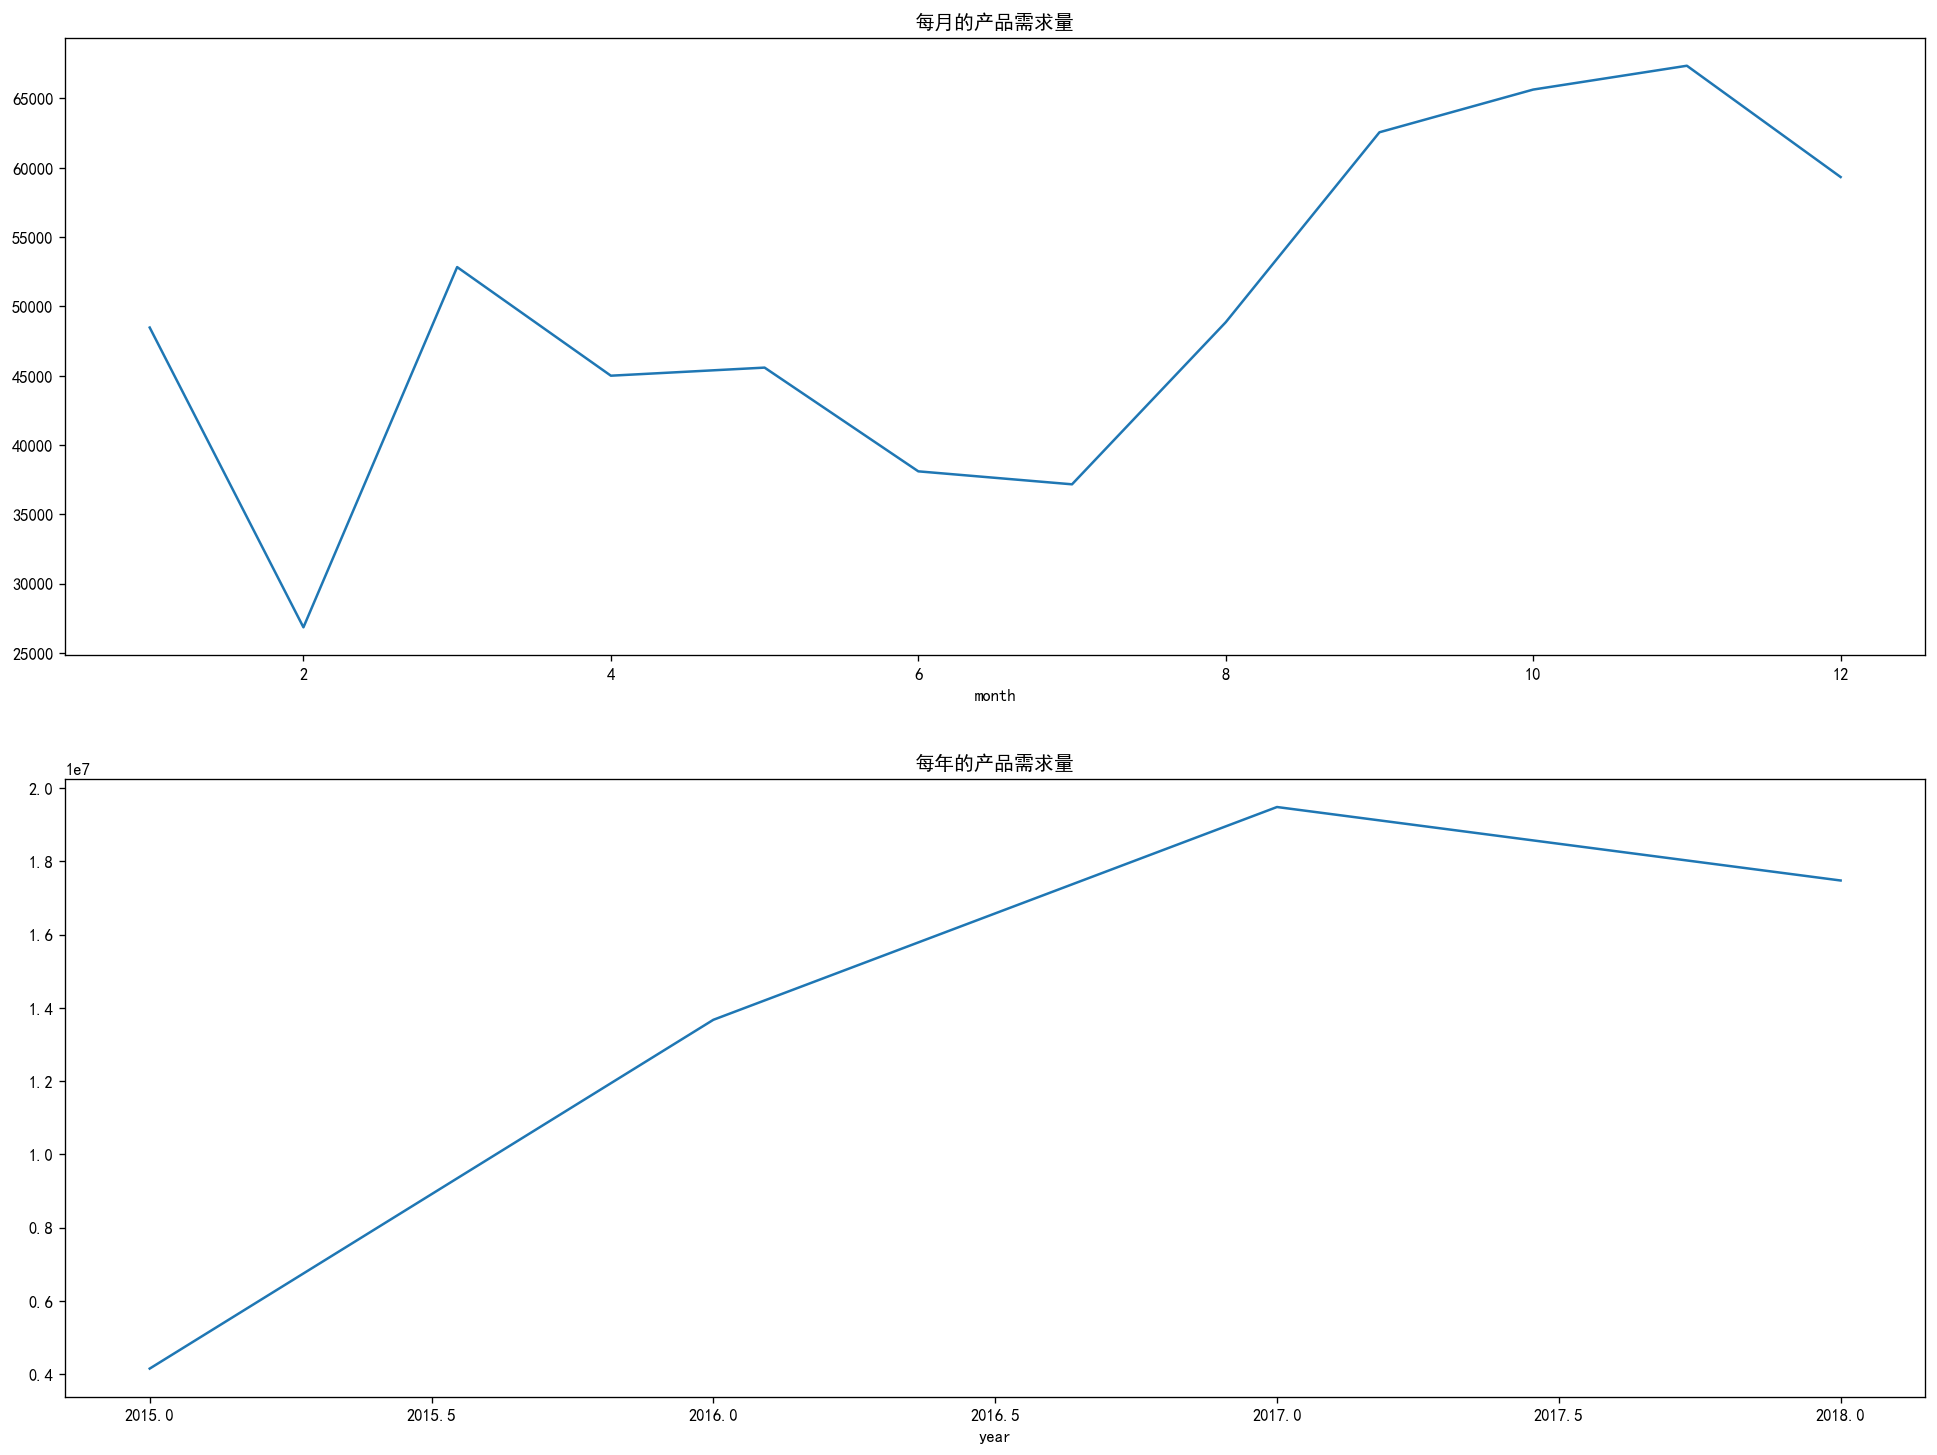

In [17]:


plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 按年份、月份统计需求量
plt.figure(figsize=(20,15),dpi=120)
# 每月产品购买数量
plt.subplot(211)  #两行两列 占据第一个位置
data.groupby(by='month')['ord_qty'].count().plot()  # 默认折线图
plt.title('每月的产品需求量')

# 每月产品消费金额
plt.subplot(212)  #两行两列 占据第二个位置
data.groupby(by='year')['ord_qty'].sum().plot()  # 默认折线图
plt.title('每年的产品需求量')

偏度 60.118377479689535
峰度 9649.27656794006


D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


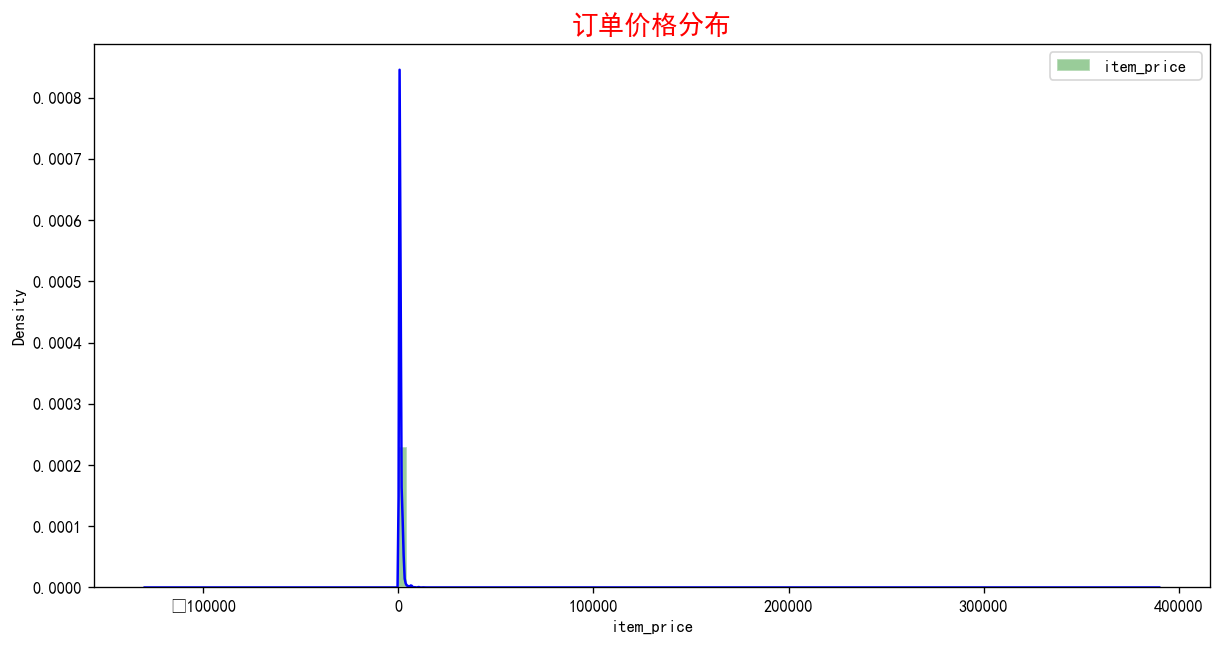

In [18]:



#用直方图和核密度看下‘订单金额’的数据分布
plt.figure(figsize=(12,6),dpi=120)
plt.hist(data['item_price'],bins=60,
         color='g',label='item_price ',
         histtype='bar',density=True,
         edgecolor = 'white',alpha=0.4)
plt.title('订单价格分布',fontdict={'fontsize':16,'color':'r'})
plt.xlabel('item_price')
plt.ylabel('密度')
plt.legend(loc = 'best')

data1=data['item_price']
data1.plot(kind='kde',color='b')

print('偏度',data1.skew())
print('峰度',data1.kurtosis())

In [19]:
# 拆分出四个季度的表
# data_month1 = data_customer.loc[data['month'] == 1,:]
# data_month2 = data_customer.loc[data['month'] == 2,:]
# data_month3 = data_customer.loc[data['month'] == 3,:]
# data_month4 = data_customer.loc[data['month'] == 4,:]
# data_month5 = data_customer.loc[data['month'] == 5,:]
# data_month6 = data_customer.loc[data['month'] == 6,:]
# data_month7 = data_customer.loc[data['month'] == 7,:]
# data_month8 = data_customer.loc[data['month'] == 8,:]
# data_month9 = data_customer.loc[data['month'] == 9,:]
# data_month10 = data_customer.loc[data['month'] ==10,:]
# data_month11 = data_customer.loc[data['month'] ==11,:]
# data_month12 = data_customer.loc[data['month'] == 12,:]


In [20]:
# # 根据顾客编号列分组，求出每位顾客每月的消费额
# data_month1_cost = data_month1.groupby('item_code').sum()
# data_month1_cost.drop(['month'], axis=1, inplace=True)
# data_month2_cost = data_month2.groupby('item_code').sum()
# data_month2_cost.drop(['month'], axis=1, inplace=True)
# data_month3_cost = data_month3.groupby('item_code').sum()
# data_month3_cost.drop(['month'], axis=1, inplace=True)
# data_month4_cost = data_month4.groupby('item_code').sum()
# data_month4_cost.drop(['month'], axis=1, inplace=True)
# data_month5_cost = data_month5.groupby('item_code').sum()
# data_month5_cost.drop(['month'], axis=1, inplace=True)
# data_month6_cost = data_month6.groupby('item_code').sum()
# data_month6_cost.drop(['month'], axis=1, inplace=True)
# data_month7_cost = data_month7.groupby('item_code').sum()
# data_month7_cost.drop(['month'], axis=1, inplace=True)
# data_month8_cost = data_month8.groupby('item_code').sum()
# data_month8_cost.drop(['month'], axis=1, inplace=True)
# data_month9_cost = data_month9.groupby('item_code').sum()
# data_month9_cost.drop(['month'], axis=1, inplace=True)
# data_month10_cost = data_month10.groupby('item_code').sum()
# data_month10_cost.drop(['month'], axis=1, inplace=True)
# data_month11_cost = data_month11.groupby('item_code').sum()
# data_month11_cost.drop(['month'], axis=1, inplace=True)
# data_month12_cost = data_month12.groupby('item_code').sum()
# data_month12_cost.drop(['month'], axis=1, inplace=True)

In [21]:
# # 将十二个需求表连接，并将NaN替换成0
# data_month1234_cost = pd.concat([data_month1_cost, data_month2_cost, data_month3_cost, data_month4_cost,data_month5_cost,data_month6_cost,data_month7_cost,data_month8_cost,data_month9_cost,data_month10_cost,data_month11_cost,data_month12_cost], axis=1, ignore_index=True)
# data_month1234_cost.columns = list(['1月需求量', '2月需求量','3月需求量', '4月需求量','5月需求量', '6月需求量','7月需求量','8月需求量','9月需求量','10月需求量','11月需求量', '12月需求量'])
# data_month1234_cost.fillna(0, inplace=True)
# data_month1234_cost.head()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


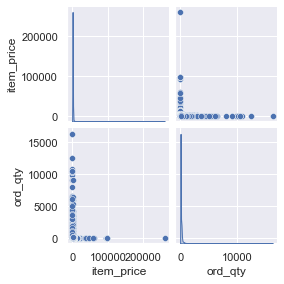

In [22]:
# 价格和需求

sns.set()
columns = ['item_price', 'ord_qty']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()


In [23]:
# 类别和需求
data_leibie = data.groupby('first_cate_code').sum()[['ord_qty']]
data_leibie

,ord_qty
first_cate_code,
301,1586734
302,6222519
303,3749304
304,618546
305,6324936
306,24551880
307,5729615
308,5995423


In [24]:
# col_count = dict(data['first_cate_code'].value_counts())
# col_count

In [25]:
# data_leibie['num'] = np.nan
# data_leibie['num'] = [2230,9339,7197,981,7487,21936,5167,5432]
# data_leibie

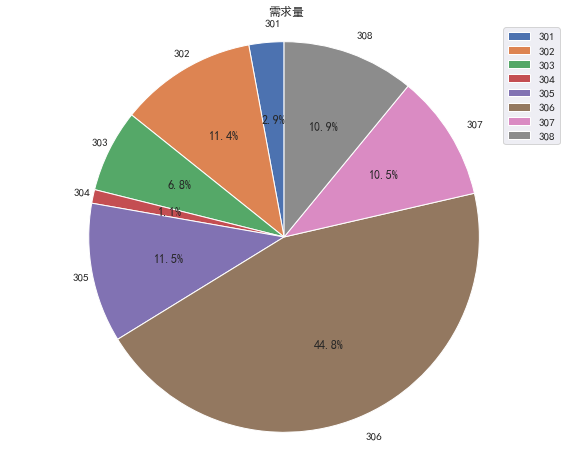

In [26]:
# 画饼图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=data_leibie['ord_qty'].values,
        labels=data_leibie.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()


In [27]:
# 小类别和需求
data_leibie2 = data.groupby('second_cate_code').sum()[['ord_qty']]
data_leibie2

,ord_qty
second_cate_code,
401,3606823
402,2530857
403,5729615
404,5995423
405,1586734
406,47046
407,22021023
408,6222519
409,618546


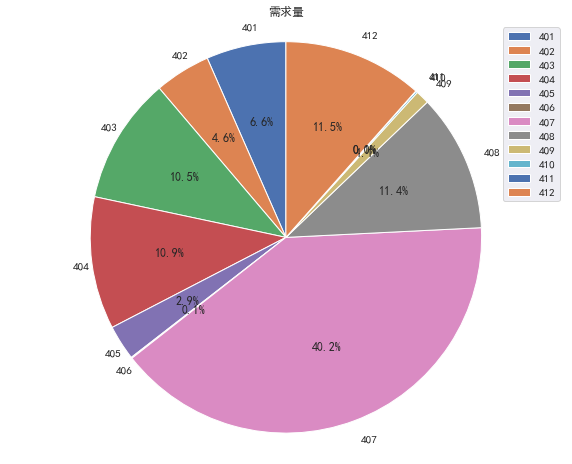

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=data_leibie2['ord_qty'].values,
        labels=data_leibie2.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()


In [29]:
# 销售区域和需求
data_chan = data.groupby('sales_chan_name').sum()[['ord_qty']]
data_chan

,ord_qty
sales_chan_name,
offline,36974193
online,17804764


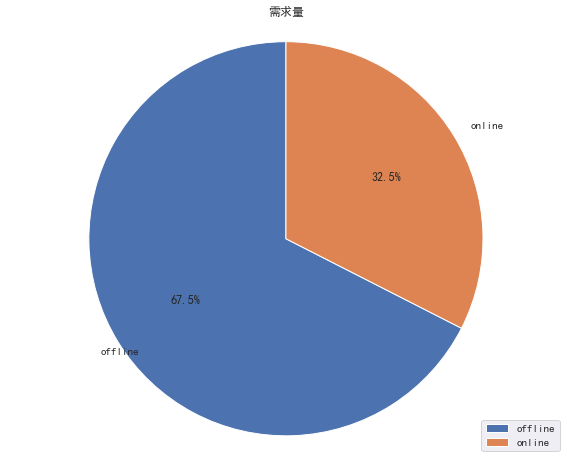

In [30]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=data_chan['ord_qty'].values,
        labels=data_chan.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()


In [31]:
# 销售区域和需求
data_region = data.groupby('sales_region_code').sum()[['ord_qty']]
data_region

,ord_qty
sales_region_code,
101,12402968
102,13970148
103,11522186
104,2387653
105,14496002


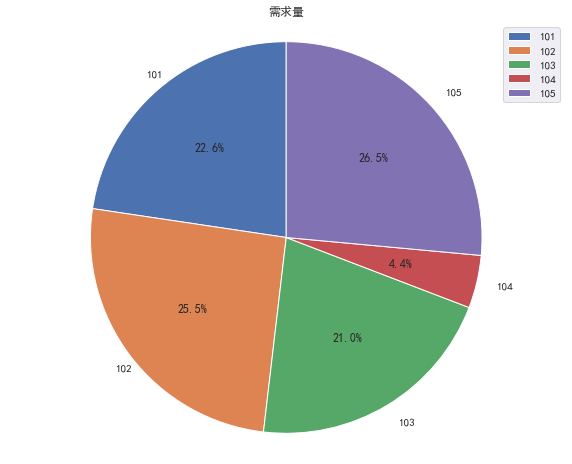

In [32]:
# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=data_region['ord_qty'].values,
        labels=data_region.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


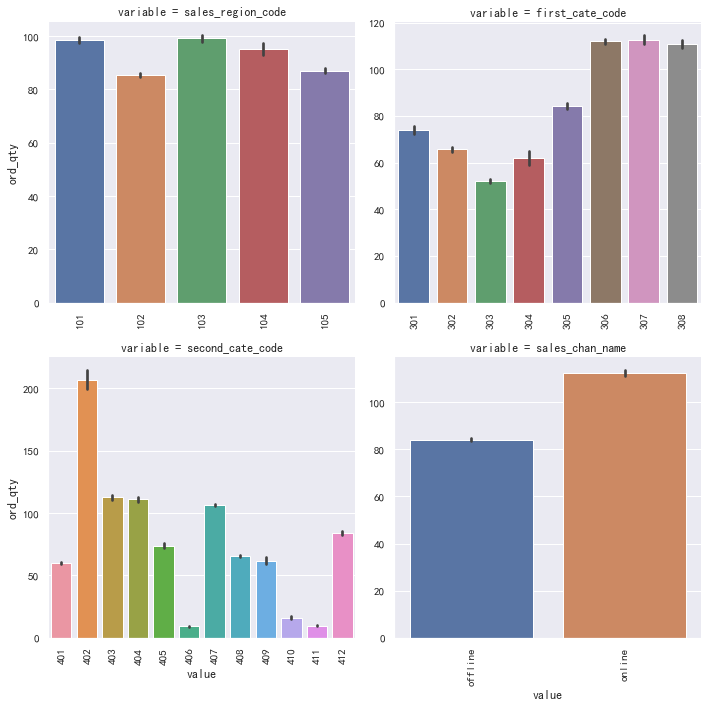

In [33]:

# 需求和几个类别型变量的关系
categorical_features=['sales_region_code','first_cate_code','second_cate_code','sales_chan_name']
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(data, id_vars=['ord_qty'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "ord_qty")

Train Data上regionCode的统计量：
_min 101
_max: 105
_mean 102.90394917800748
_ptp 4
_std 1.5048782458710506
_var 2.26465853489593


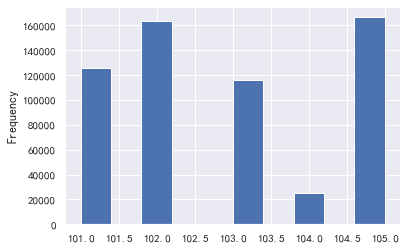

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


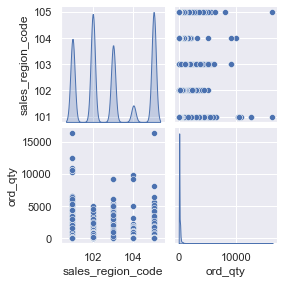

105    166617
102    163856
101    125925
103    116233
104     25063
Name: sales_region_code, dtype: int64

In [34]:
## 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))
    
# 处理regionCode
print('Train Data上regionCode的统计量：')
Sta_inf(data['sales_region_code'])
# print('Test Data上regionCode的统计量:')
# Sta_inf(TestA_data['regionCode'])

data['sales_region_code'].plot.hist() 
plt.show()
# TestA_data['regionCode'].plot.hist()
# plt.show()

sns.set()
columns = ['sales_region_code', 'ord_qty']
sns.pairplot(data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()


data['sales_region_code'].value_counts() 
# TestA_data['regionCode'].value_counts() 

In [35]:
# 需求量和时间
# 拆分出四个年份的时间表
data_year2015 = data.loc[data['year'] == 2015,:]
data_year2016 = data.loc[data['year'] == 2016,:]
data_year2017 = data.loc[data['year'] == 2017,:]
data_year2018 = data.loc[data['year'] == 2018,:]

In [36]:
#对2015年第一大类商品的日需求量进行可视化
qty_day2015_301 = data_year2015.loc[data['first_cate_code'] == 301,:]
qty_day2015_302 = data_year2015.loc[data['first_cate_code'] == 302,:]
qty_day2015_303 = data_year2015.loc[data['first_cate_code'] == 303,:]
qty_day2015_304 = data_year2015.loc[data['first_cate_code'] == 304,:]
qty_day2015_305 = data_year2015.loc[data['first_cate_code'] == 305,:]
qty_day2015_306 = data_year2015.loc[data['first_cate_code'] == 306,:]
qty_day2015_307 = data_year2015.loc[data['first_cate_code'] == 307,:]
qty_day2015_308 = data_year2015.loc[data['first_cate_code'] == 308,:]
qty_day2015_301

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1
7,2015-09-02,104,20028,301,405,offline,1005.0,11,9,2015,2
201,2015-09-05,104,20085,301,405,online,901.0,84,9,2015,5
202,2015-09-05,104,20003,301,405,online,740.0,83,9,2015,5
203,2015-09-05,104,21986,301,405,online,325.0,126,9,2015,5
...,...,...,...,...,...,...,...,...,...,...,...
35661,2015-12-30,104,20911,301,405,online,1032.0,10,12,2015,30
35684,2015-12-30,104,20003,301,405,offline,736.0,4,12,2015,30
35695,2015-12-31,104,20219,301,405,online,397.0,104,12,2015,31
35696,2015-12-31,104,20003,301,405,online,739.0,21,12,2015,31


In [37]:
qty_day2015_301 = qty_day2015_301.groupby('day')['ord_qty'].count()
qty_day2015_302 = qty_day2015_302.groupby('day')['ord_qty'].count()
qty_day2015_303 = qty_day2015_303.groupby('day')['ord_qty'].count()
qty_day2015_304 = qty_day2015_304.groupby('day')['ord_qty'].count()
qty_day2015_305 = qty_day2015_305.groupby('day')['ord_qty'].count()
qty_day2015_306 = qty_day2015_306.groupby('day')['ord_qty'].count()
qty_day2015_307 = qty_day2015_307.groupby('day')['ord_qty'].count()
qty_day2015_308 = qty_day2015_308.groupby('day')['ord_qty'].count()

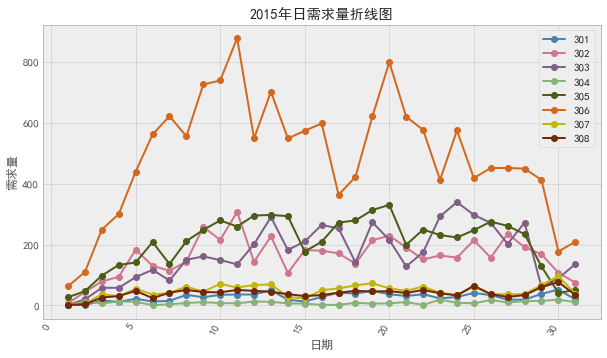

In [44]:
import matplotlib as mpl
# 设置绘图风格
# plt.style.use('ggplot')
plt.style.use('bmh')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--301商品销售折线图
plt.plot(qty_day2015_301.index, # x轴数据
         qty_day2015_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '301') # 点的填充色
         
# 绘图--一般商品销售折线图
plt.plot(qty_day2015_302.index, # x轴数据
         qty_day2015_302.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '302') # 点的填充色

plt.plot(qty_day2015_303.index, # x轴数据
         qty_day2015_303.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '303') # 点的填充色

plt.plot(qty_day2015_304.index, # x轴数据
         qty_day2015_304.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '304') # 点的填充色

plt.plot(qty_day2015_305.index, # x轴数据
         qty_day2015_305.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#4b5d16', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#4b5d16',
         label = '305') # 点的填充色

plt.plot(qty_day2015_306.index, # x轴数据
         qty_day2015_306.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#D2691E', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#D2691E',
         label = '306') # 点的填充色

plt.plot(qty_day2015_307.index, # x轴数据
         qty_day2015_307.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#c2b709', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#c2b709',
         label = '307') # 点的填充色

plt.plot(qty_day2015_308.index, # x轴数据
         qty_day2015_308.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#742802', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#742802',
         label = '308') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2015年日需求量折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [40]:
#对2016年第一大类商品的日需求量进行可视化

qty_day2016_301 = data_year2016.loc[data['first_cate_code'] == 301,:]
qty_day2016_302 = data_year2016.loc[data['first_cate_code'] == 302,:]
qty_day2016_303 = data_year2016.loc[data['first_cate_code'] == 303,:]
qty_day2016_304 = data_year2016.loc[data['first_cate_code'] == 304,:]
qty_day2016_305 = data_year2016.loc[data['first_cate_code'] == 305,:]
qty_day2016_306 = data_year2016.loc[data['first_cate_code'] == 306,:]
qty_day2016_307 = data_year2016.loc[data['first_cate_code'] == 307,:]
qty_day2016_308 = data_year2016.loc[data['first_cate_code'] == 308,:]
qty_day2016_301

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day
35753,2016-01-02,104,21836,301,405,online,1208.0,90,1,2016,2
35754,2016-01-02,104,21801,301,405,online,864.0,162,1,2016,2
35755,2016-01-02,104,20911,301,405,online,1374.0,83,1,2016,2
35756,2016-01-02,104,20085,301,405,online,1046.0,259,1,2016,2
35757,2016-01-02,104,20003,301,405,online,927.0,112,1,2016,2
...,...,...,...,...,...,...,...,...,...,...,...
178134,2016-12-29,104,20944,301,405,online,490.0,13,12,2016,29
178135,2016-12-29,104,21731,301,405,online,958.0,5,12,2016,29
178570,2016-12-30,104,20219,301,405,online,511.0,22,12,2016,30
178571,2016-12-30,104,21986,301,405,online,357.0,203,12,2016,30


In [41]:
qty_day2016_301 = qty_day2016_301.groupby('day')['ord_qty'].count()
qty_day2016_302 = qty_day2016_302.groupby('day')['ord_qty'].count()
qty_day2016_303 = qty_day2016_303.groupby('day')['ord_qty'].count()
qty_day2016_304 = qty_day2016_304.groupby('day')['ord_qty'].count()
qty_day2016_305 = qty_day2016_305.groupby('day')['ord_qty'].count()
qty_day2016_306 = qty_day2016_306.groupby('day')['ord_qty'].count()
qty_day2016_307 = qty_day2016_307.groupby('day')['ord_qty'].count()
qty_day2016_308 = qty_day2016_308.groupby('day')['ord_qty'].count()

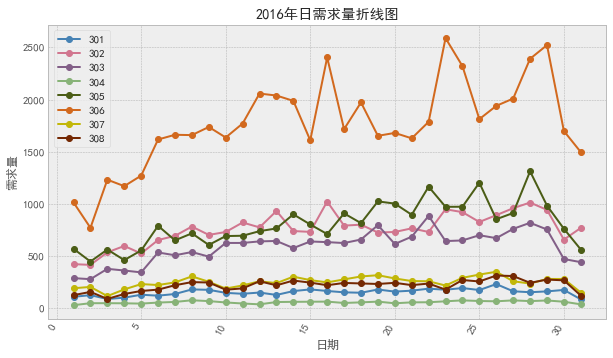

In [43]:

import matplotlib as mpl
# 设置绘图风格
# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--301商品销售折线图
plt.plot(qty_day2016_301.index, # x轴数据
         qty_day2016_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '301') # 点的填充色
         
# 绘图--一般商品销售折线图
plt.plot(qty_day2016_302.index, # x轴数据
         qty_day2016_302.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '302') # 点的填充色

plt.plot(qty_day2016_303.index, # x轴数据
         qty_day2016_303.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '303') # 点的填充色

plt.plot(qty_day2016_304.index, # x轴数据
         qty_day2016_304.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '304') # 点的填充色

plt.plot(qty_day2016_305.index, # x轴数据
         qty_day2016_305.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#4b5d16', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#4b5d16',
         label = '305') # 点的填充色

plt.plot(qty_day2016_306.index, # x轴数据
         qty_day2016_306.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#D2691E', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#D2691E',
         label = '306') # 点的填充色

plt.plot(qty_day2016_307.index, # x轴数据
         qty_day2016_307.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#c2b709', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#c2b709',
         label = '307') # 点的填充色

plt.plot(qty_day2016_308.index, # x轴数据
         qty_day2016_308.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#742802', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#742802',
         label = '308') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2016年日需求量折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [45]:




#对2017年第一大类商品的日需求量进行可视化
qty_day2017_301 = data_year2017.loc[data['first_cate_code'] == 301,:]
qty_day2017_302 = data_year2017.loc[data['first_cate_code'] == 302,:]
qty_day2017_303 = data_year2017.loc[data['first_cate_code'] == 303,:]
qty_day2017_304 = data_year2017.loc[data['first_cate_code'] == 304,:]
qty_day2017_305 = data_year2017.loc[data['first_cate_code'] == 305,:]
qty_day2017_306 = data_year2017.loc[data['first_cate_code'] == 306,:]
qty_day2017_307 = data_year2017.loc[data['first_cate_code'] == 307,:]
qty_day2017_308 = data_year2017.loc[data['first_cate_code'] == 308,:]
qty_day2017_301

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day
178624,2017-01-01,101,21260,301,405,offline,961.0,55,1,2017,1
178625,2017-01-01,101,21550,301,405,offline,1012.0,38,1,2017,1
178626,2017-01-01,101,20027,301,405,offline,957.0,6,1,2017,1
178627,2017-01-01,101,21260,301,405,offline,963.0,57,1,2017,1
178634,2017-01-01,101,20416,301,405,offline,713.0,673,1,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
375238,2017-12-31,102,20525,301,405,offline,874.0,221,12,2017,31
375252,2017-12-31,103,21731,301,405,offline,502.0,202,12,2017,31
375253,2017-12-31,103,21986,301,405,offline,426.0,309,12,2017,31
375254,2017-12-31,103,20416,301,405,offline,844.0,159,12,2017,31


In [46]:

qty_day2017_301 = qty_day2017_301.groupby('day')['ord_qty'].count()
qty_day2017_302 = qty_day2017_302.groupby('day')['ord_qty'].count()
qty_day2017_303 = qty_day2017_303.groupby('day')['ord_qty'].count()
qty_day2017_304 = qty_day2017_304.groupby('day')['ord_qty'].count()
qty_day2017_305 = qty_day2017_305.groupby('day')['ord_qty'].count()
qty_day2017_306 = qty_day2017_306.groupby('day')['ord_qty'].count()
qty_day2017_307 = qty_day2017_307.groupby('day')['ord_qty'].count()
qty_day2017_308 = qty_day2017_308.groupby('day')['ord_qty'].count()

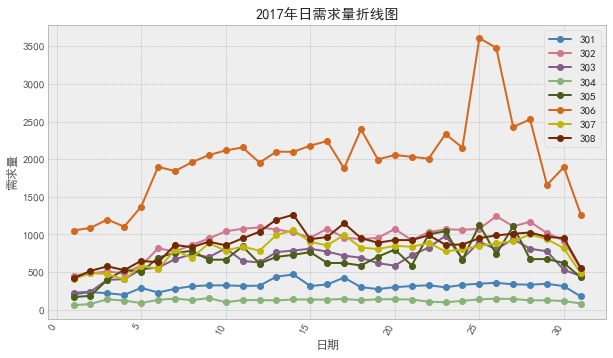

In [47]:
import matplotlib as mpl
# 设置绘图风格
# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--301商品销售折线图
plt.plot(qty_day2017_301.index, # x轴数据
         qty_day2017_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '301') # 点的填充色
         
# 绘图--一般商品销售折线图
plt.plot(qty_day2017_302.index, # x轴数据
         qty_day2017_302.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '302') # 点的填充色

plt.plot(qty_day2017_303.index, # x轴数据
         qty_day2017_303.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '303') # 点的填充色

plt.plot(qty_day2017_304.index, # x轴数据
         qty_day2017_304.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '304') # 点的填充色

plt.plot(qty_day2017_305.index, # x轴数据
         qty_day2017_305.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#4b5d16', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#4b5d16',
         label = '305') # 点的填充色

plt.plot(qty_day2017_306.index, # x轴数据
         qty_day2017_306.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#D2691E', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#D2691E',
         label = '306') # 点的填充色

plt.plot(qty_day2017_307.index, # x轴数据
         qty_day2017_307.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#c2b709', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#c2b709',
         label = '307') # 点的填充色

plt.plot(qty_day2017_308.index, # x轴数据
         qty_day2017_308.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#742802', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#742802',
         label = '308') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2017年日需求量折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [48]:
#对2018年第一大类商品的日需求量进行可视化
qty_day2018_301 = data_year2018.loc[data['first_cate_code'] == 301,:]
qty_day2018_302 = data_year2018.loc[data['first_cate_code'] == 302,:]
qty_day2018_303 = data_year2018.loc[data['first_cate_code'] == 303,:]
qty_day2018_304 = data_year2018.loc[data['first_cate_code'] == 304,:]
qty_day2018_305 = data_year2018.loc[data['first_cate_code'] == 305,:]
qty_day2018_306 = data_year2018.loc[data['first_cate_code'] == 306,:]
qty_day2018_307 = data_year2018.loc[data['first_cate_code'] == 307,:]
qty_day2018_308 = data_year2018.loc[data['first_cate_code'] == 308,:]
qty_day2018_301

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day
375294,2018-01-01,105,20814,301,405,online,657.0,26,1,2018,1
375295,2018-01-01,105,20003,301,405,online,938.0,23,1,2018,1
375298,2018-01-01,105,21986,301,405,online,418.0,34,1,2018,1
375349,2018-01-02,105,20003,301,405,online,949.0,183,1,2018,2
375351,2018-01-02,105,20085,301,405,online,1044.0,57,1,2018,2
...,...,...,...,...,...,...,...,...,...,...,...
597366,2018-12-20,105,21088,301,405,offline,1212.0,10,12,2018,20
597502,2018-12-20,102,21000,301,405,offline,1566.0,16,12,2018,20
597503,2018-12-20,102,20525,301,405,offline,881.0,11,12,2018,20
597533,2018-12-20,102,20316,301,405,offline,1048.0,12,12,2018,20


In [49]:
qty_day2018_301 = qty_day2018_301.groupby('day')['ord_qty'].count()
qty_day2018_302 = qty_day2018_302.groupby('day')['ord_qty'].count()
qty_day2018_303 = qty_day2018_303.groupby('day')['ord_qty'].count()
qty_day2018_304 = qty_day2018_304.groupby('day')['ord_qty'].count()
qty_day2018_305 = qty_day2018_305.groupby('day')['ord_qty'].count()
qty_day2018_306 = qty_day2018_306.groupby('day')['ord_qty'].count()
qty_day2018_307 = qty_day2018_307.groupby('day')['ord_qty'].count()
qty_day2018_308 = qty_day2018_308.groupby('day')['ord_qty'].count()

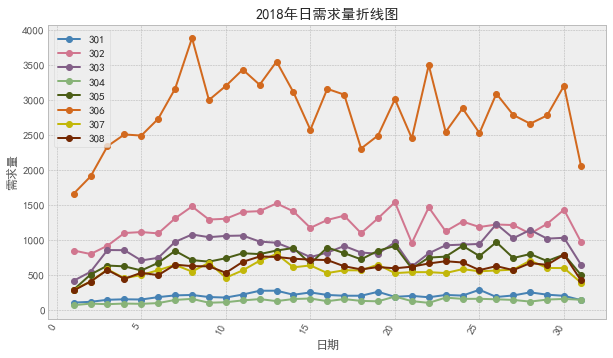

In [50]:
import matplotlib as mpl
# 设置绘图风格
# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--301商品销售折线图
plt.plot(qty_day2018_301.index, # x轴数据
         qty_day2018_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '301') # 点的填充色
         
# 绘图--一般商品销售折线图
plt.plot(qty_day2018_302.index, # x轴数据
         qty_day2018_302.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '302') # 点的填充色

plt.plot(qty_day2018_303.index, # x轴数据
         qty_day2018_303.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '303') # 点的填充色

plt.plot(qty_day2018_304.index, # x轴数据
         qty_day2018_304.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '304') # 点的填充色

plt.plot(qty_day2018_305.index, # x轴数据
         qty_day2018_305.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#4b5d16', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#4b5d16',
         label = '305') # 点的填充色

plt.plot(qty_day2018_306.index, # x轴数据
         qty_day2018_306.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#D2691E', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#D2691E',
         label = '306') # 点的填充色

plt.plot(qty_day2018_307.index, # x轴数据
         qty_day2018_307.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#c2b709', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#c2b709',
         label = '307') # 点的填充色

plt.plot(qty_day2018_308.index, # x轴数据
         qty_day2018_308.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#742802', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#742802',
         label = '308') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2018年日需求量折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

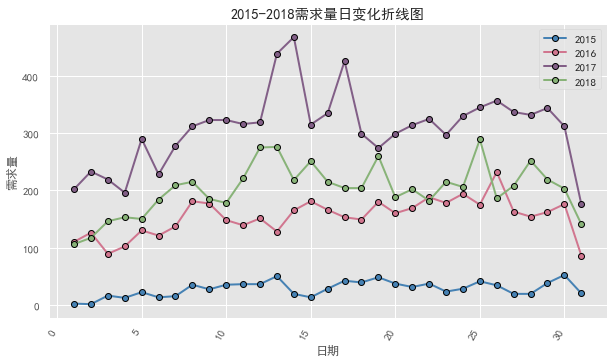

In [48]:
import matplotlib as mpl
# 设置绘图风格
plt.style.use('ggplot')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--301商品销售折线图
plt.plot(qty_day2015_301.index, # x轴数据
         qty_day2015_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '2015') # 点的填充色
         

plt.plot(qty_day2016_301.index, # x轴数据
         qty_day2016_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '2016') # 点的填充色

plt.plot(qty_day2017_301.index, # x轴数据
         qty_day2017_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '2017') # 点的填充色

plt.plot(qty_day2018_301.index, # x轴数据
         qty_day2018_301.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '2018') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2015-2018需求量日变化折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [51]:
qty_month2015_9 = data_year2015.loc[data['month'] == 9,:]
qty_month2015_10 = data_year2015.loc[data['month'] == 10,:]
qty_month2015_11 = data_year2015.loc[data['month'] == 11,:]
qty_month2015_12 = data_year2015.loc[data['month'] == 12,:]

In [52]:
qty_month2015_9

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,1
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,2
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,2
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,2
...,...,...,...,...,...,...,...,...,...,...,...
7730,2015-09-30,102,20122,302,408,offline,1320.0,77,9,2015,30
7731,2015-09-30,102,20338,302,408,offline,915.0,109,9,2015,30
7732,2015-09-30,102,21888,306,407,offline,1063.0,17,9,2015,30
7733,2015-09-30,101,21327,302,408,offline,2905.0,12,9,2015,30


In [53]:
# 加入星期特征week
qty_month2015_9['week'] = 0
qty_month2015_9.week[qty_month2015_9['day']==2 ]=3
qty_month2015_9.week[qty_month2015_9['day']==9 ]=3
qty_month2015_9.week[qty_month2015_9['day']==16 ]=3
qty_month2015_9.week[qty_month2015_9['day']==23 ]=3
qty_month2015_9.week[qty_month2015_9['day']==30 ]=3

qty_month2015_9.week[qty_month2015_9['day']==3 ]=4
qty_month2015_9.week[qty_month2015_9['day']==10 ]=4
qty_month2015_9.week[qty_month2015_9['day']==17 ]=4
qty_month2015_9.week[qty_month2015_9['day']==24 ]=4

qty_month2015_9.week[qty_month2015_9['day']==4 ]=5
qty_month2015_9.week[qty_month2015_9['day']==11 ]=5
qty_month2015_9.week[qty_month2015_9['day']==18 ]=5
qty_month2015_9.week[qty_month2015_9['day']==25 ]=5

qty_month2015_9.week[qty_month2015_9['day']==5 ]=6
qty_month2015_9.week[qty_month2015_9['day']==12 ]=6
qty_month2015_9.week[qty_month2015_9['day']==19 ]=6
qty_month2015_9.week[qty_month2015_9['day']==26 ]=6

qty_month2015_9.week[qty_month2015_9['day']==6 ]=7
qty_month2015_9.week[qty_month2015_9['day']==13 ]=7
qty_month2015_9.week[qty_month2015_9['day']==20 ]=7
qty_month2015_9.week[qty_month2015_9['day']==27 ]=7

qty_month2015_9.week[qty_month2015_9['day']==7 ]=1
qty_month2015_9.week[qty_month2015_9['day']==14 ]=1
qty_month2015_9.week[qty_month2015_9['day']==21 ]=1
qty_month2015_9.week[qty_month2015_9['day']==28 ]=1

qty_month2015_9.week[qty_month2015_9['day']==1 ]=2
qty_month2015_9.week[qty_month2015_9['day']==8]=2
qty_month2015_9.week[qty_month2015_9['day']==15 ]=2
qty_month2015_9.week[qty_month2015_9['day']==22 ]=2
qty_month2015_9.week[qty_month2015_9['day']==29 ]=2

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/2139453825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qty_month2015_9['week'] = 0
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/2139453825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qty_month2015_9.week[qty_month2015_9['day']==2 ]=3
D:\anaconda\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [54]:

qty_month2015_10['week'] = qty_month2015_10['order_date'].dt.weekday + 1
qty_month2015_11['week'] = qty_month2015_11['order_date'].dt.weekday + 1
qty_month2015_12['week'] = qty_month2015_12['order_date'].dt.weekday + 1

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1483839185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qty_month2015_10['week'] = qty_month2015_10['order_date'].dt.weekday + 1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1483839185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qty_month2015_11['week'] = qty_month2015_11['order_date'].dt.weekday + 1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1483839185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [55]:
qty_month2015_10

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,week
7735,2015-10-04,105,20900,306,407,online,748.0,265,10,2015,4,7
7736,2015-10-04,105,20009,306,407,online,676.0,50,10,2015,4,7
7737,2015-10-04,104,20003,301,405,online,731.0,45,10,2015,4,7
7738,2015-10-04,104,21524,307,403,online,369.0,38,10,2015,4,7
7739,2015-10-04,104,21277,308,404,online,983.0,27,10,2015,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...
15847,2015-10-31,101,21742,303,401,offline,3008.0,13,10,2015,31,6
15848,2015-10-31,101,21774,303,401,offline,905.0,5,10,2015,31,6
15849,2015-10-31,101,22055,303,401,offline,4613.0,10,10,2015,31,6
15850,2015-10-31,104,21266,304,409,offline,1566.0,50,10,2015,31,6


In [56]:

qty_month2015_9

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,week
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,1,2
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1,2
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,2,3
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,2,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7730,2015-09-30,102,20122,302,408,offline,1320.0,77,9,2015,30,3
7731,2015-09-30,102,20338,302,408,offline,915.0,109,9,2015,30,3
7732,2015-09-30,102,21888,306,407,offline,1063.0,17,9,2015,30,3
7733,2015-09-30,101,21327,302,408,offline,2905.0,12,9,2015,30,3


In [57]:
qty_month2015_9_week = qty_month2015_9.groupby('week')['ord_qty'].count()
qty_month2015_10_week = qty_month2015_10.groupby('week')['ord_qty'].count()
qty_month2015_11_week = qty_month2015_11.groupby('week')['ord_qty'].count()
qty_month2015_12_week = qty_month2015_12.groupby('week')['ord_qty'].count()


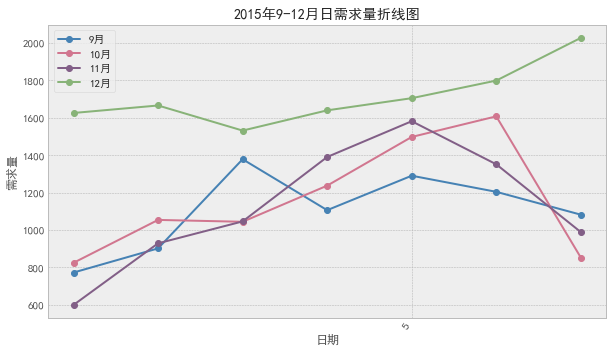

In [59]:
#可视化2015年9-12月星期变化
import matplotlib as mpl
# 设置绘图风格
# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图
plt.plot(qty_month2015_9_week.index, # x轴数据
         qty_month2015_9_week.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '9月') # 点的填充色
         
# 绘图--一般商品销售折线图
plt.plot(qty_month2015_10_week.index, # x轴数据
         qty_month2015_10_week.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '10月') # 点的填充色

plt.plot(qty_month2015_11_week.index, # x轴数据
         qty_month2015_11_week.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '11月') # 点的填充色

plt.plot(qty_month2015_12_week.index, # x轴数据
         qty_month2015_12_week.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '12月') # 点的填充色



# 添加标题和坐标轴标签
plt.title('2015年9-12月日需求量折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [60]:
qty_month2015_9 = qty_month2015_9.groupby('day')['ord_qty'].count()
qty_month2015_10 = qty_month2015_10.groupby('day')['ord_qty'].count()
qty_month2015_11 = qty_month2015_11.groupby('day')['ord_qty'].count()
qty_month2015_12 = qty_month2015_12.groupby('day')['ord_qty'].count()

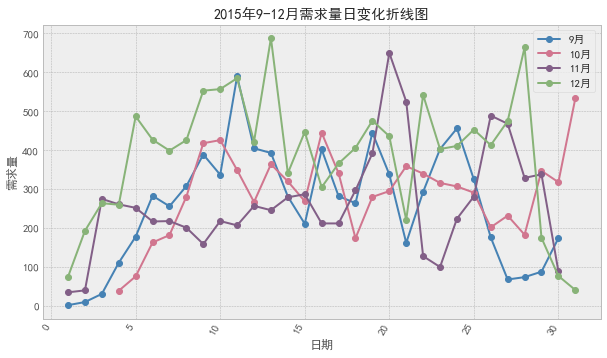

In [61]:

import matplotlib as mpl
# 设置绘图风格
# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--301商品销售折线图
plt.plot(qty_month2015_9.index, # x轴数据
         qty_month2015_9.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '9月') # 点的填充色
         
# 绘图--一般商品销售折线图
plt.plot(qty_month2015_10.index, # x轴数据
         qty_month2015_10.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '10月') # 点的填充色

plt.plot(qty_month2015_11.index, # x轴数据
         qty_month2015_11.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '11月') # 点的填充色

plt.plot(qty_month2015_12.index, # x轴数据
         qty_month2015_12.values, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '12月') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2015年9-12月需求量日变化折线图')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [62]:
# 2015年
qty_month2015 = data_year2015.groupby('month')['ord_qty'].count()
qty_month2015 = qty_month2015.reset_index()
qty_month2015 = qty_month2015.rename(columns={'ord_qty':'qty_month'})
qty_month2015

,month,qty_month
0,9,7735
1,10,8117
2,11,7886
3,12,11988


In [63]:
qty_month2016 = data_year2016.groupby('month')['ord_qty'].count()
qty_month2016 = qty_month2016.reset_index()
qty_month2016 = qty_month2016.rename(columns={'ord_qty':'qty_month'})
qty_month2016

,month,qty_month
0,1,14569
1,2,4823
2,3,12964
3,4,11217
4,5,12657
5,6,10820
6,7,9176
7,8,12496
8,9,11863
9,10,13958


In [64]:
qty_month2017 = data_year2017.groupby('month')['ord_qty'].count()
qty_month2017 = qty_month2017.reset_index()
qty_month2017 = qty_month2017.rename(columns={'ord_qty':'qty_month'})
qty_month2017

,month,qty_month
0,1,11294
1,2,13213
2,3,19960
3,4,18697
4,5,17256
5,6,14595
6,7,13729
7,8,16937
8,9,18568
9,10,17436


In [65]:
qty_month2018 = data_year2018.groupby('month')['ord_qty'].count()
qty_month2018 = qty_month2018.reset_index()
qty_month2018 = qty_month2018.rename(columns={'ord_qty':'qty_month'})
qty_month2018

,month,qty_month
0,1,22606
1,2,8807
2,3,19906
3,4,15081
4,5,15665
5,6,12680
6,7,14254
7,8,19419
8,9,24390
9,10,26125


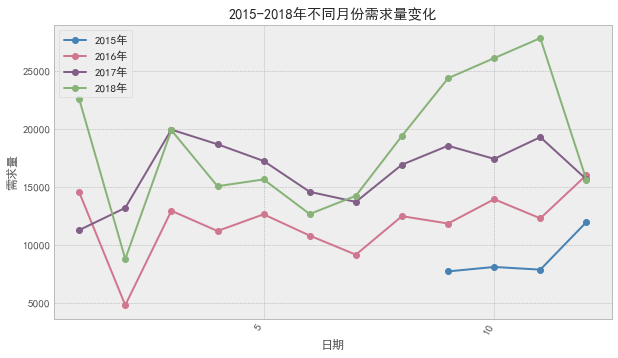

In [66]:
# 可视化2015-2018年不同月份需求量变化
# fig, axes = plt.subplots(4,1,sharex=True)
# qty_month2015.plot(x='month',y='qty_month',ax=axes[0],colormap='cividis')
# qty_month2016.plot(x='month', y='qty_month', ax=axes[1],colormap='RdGy')
# qty_month2017.plot(x='month', y='qty_month', ax=axes[2],colormap='cividis')
# qty_month2018.plot(x='month', y='qty_month', ax=axes[3],colormap='RdGy')
# axes[0].set_title('2015')
# axes[1].set_title('2016')
# axes[2].set_title('2017')
# axes[3].set_title('2018')

# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--
plt.plot(qty_month2015['month'], # x轴数据
         qty_month2015['qty_month'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = '2015年') # 点的填充色
         
# 绘图--
plt.plot(qty_month2016['month'], # x轴数据
         qty_month2016['qty_month'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = '2016年') # 点的填充色

plt.plot(qty_month2017['month'], # x轴数据
         qty_month2017['qty_month'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = '2017年') # 点的填充色

plt.plot(qty_month2018['month'], # x轴数据
         qty_month2018['qty_month'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = '2018年') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2015-2018年不同月份需求量变化')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [67]:

# 分季度对比
data['season'] = 0

data.season[(data.month == 1)] = 1
data.season[(data.month == 2)] = 1
data.season[(data.month == 3)] = 1
data.season[(data.month == 4)] = 2
data.season[(data.month == 5)] = 2
data.season[(data.month == 6)] = 2
data.season[(data.month == 7)] = 3
data.season[(data.month == 8)] = 3
data.season[(data.month == 9)] = 3
data.season[(data.month == 10)] = 4
data.season[(data.month == 11)] = 4
data.season[(data.month == 12)] = 4


C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1808567178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.season[(data.month == 1)] = 1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1808567178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.season[(data.month == 2)] = 1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1808567178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.season[(data.month == 3)]

In [68]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,1,3
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1,3
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,2,3
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,2,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,20,4
597690,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,20,4
597691,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,20,4
597692,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,20,4


In [69]:
data_season1 = data.loc[data['season'] == 1,:]
data_season2 = data.loc[data['season'] == 2,:]
data_season3 = data.loc[data['season'] == 3,:]
data_season4 = data.loc[data['season'] == 4,:]

In [70]:
# 不同年份同季度对比
qty_season1 = data_season1.groupby('year')['ord_qty'].count()
qty_season1 = qty_season1.reset_index()
qty_season1 = qty_season1.rename(columns={'ord_qty':'qty_season'})

qty_season2 = data_season2.groupby('year')['ord_qty'].count()
qty_season2 = qty_season2.reset_index()
qty_season2 = qty_season2.rename(columns={'ord_qty':'qty_season'})

qty_season3 = data_season3.groupby('year')['ord_qty'].count()
qty_season3 = qty_season3.reset_index()
qty_season3 = qty_season3.rename(columns={'ord_qty':'qty_season'})

qty_season4 = data_season4.groupby('year')['ord_qty'].count()
qty_season4 = qty_season4.reset_index()
qty_season4 = qty_season4.rename(columns={'ord_qty':'qty_season'})

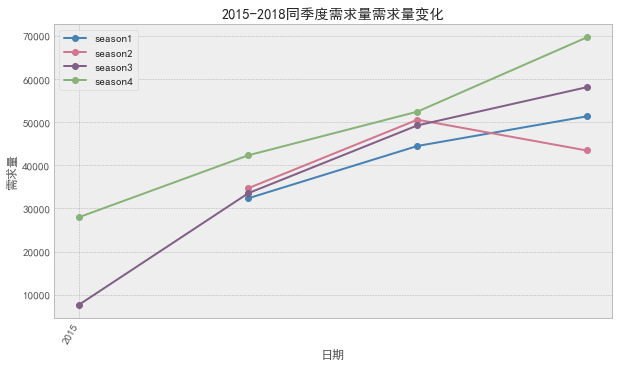

In [71]:
# 可视化不同不同年份同季度需求量
# fig, axes = plt.subplots(4,1,sharex=True)
# qty_season1.plot(x='year',y='qty_season',ax=axes[0],colormap='cividis')
# qty_season2.plot(x='year', y='qty_season', ax=axes[1],colormap='RdGy')
# qty_season3.plot(x='year', y='qty_season', ax=axes[2],colormap='cividis')
# qty_season4.plot(x='year', y='qty_season', ax=axes[3],colormap='RdGy')
# axes[0].set_title('season1')
# axes[1].set_title('season2')
# axes[2].set_title('season3')
# axes[3].set_title('season4')

# plt.style.use('ggplot')
plt.style.use('bmh')

# 设置图框的大小
fig = plt.figure(figsize=(10,6))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘图--
plt.plot(qty_season1['year'], # x轴数据
         qty_season1['qty_season'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='steelblue',
         label = 'season1') # 点的填充色
         
# 绘图--
plt.plot(qty_season2['year'], # x轴数据
         qty_season2['qty_season'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1768f', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#d1768f',
         label = 'season2') # 点的填充色

plt.plot(qty_season3['year'], # x轴数据
         qty_season3['qty_season'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#825f87', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#825f87',
         label = 'season3') # 点的填充色

plt.plot(qty_season4['year'], # x轴数据
         qty_season4['qty_season'], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#88b378', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='#88b378',
         label = 'season4') # 点的填充色

# 添加标题和坐标轴标签
plt.title('2015-2018同季度需求量需求量变化')
plt.xlabel('日期')
plt.ylabel('需求量')
# 显示label
plt.legend()

# 日期刻度标签60度倾斜
fig.autofmt_xdate(rotation = 60)

# 设置x轴显示密度间隔为5
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# 显示图形
plt.show()

In [72]:
# 分月初、月中、月末
data['day_period'] = 0

data.day_period[(data.day >= 1)&(data.day <10)] = 1
data.day_period[(data.day >= 10)&(data.day <20)] = 2
data.day_period[(data.day >= 20)] = 3
data

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1567467431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.day_period[(data.day >= 1)&(data.day <10)] = 1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1567467431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.day_period[(data.day >= 10)&(data.day <20)] = 2
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1567467431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,1,3,1
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1,3,1
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,2,3,1
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,2,3,1
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597689,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,20,4,3
597690,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,20,4,3
597691,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,20,4,3
597692,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,20,4,3


In [73]:


data_month1 = data.loc[data['month'] == 1,:]
data_month2 = data.loc[data['month'] == 2,:]
data_month3 = data.loc[data['month'] == 3,:]
data_month4 = data.loc[data['month'] == 4,:]
data_month5 = data.loc[data['month'] == 5,:]
data_month6 = data.loc[data['month'] == 6,:]
data_month7 = data.loc[data['month'] == 7,:]
data_month8 = data.loc[data['month'] == 8,:]
data_month9 = data.loc[data['month'] == 9,:]
data_month10 = data.loc[data['month'] ==10,:]
data_month11 = data.loc[data['month'] ==11,:]
data_month12 = data.loc[data['month'] == 12,:]


In [74]:
# 不同月份 月初月末对比
qty_month1 = data_month1.groupby('day_period')['ord_qty'].count()
qty_month1 = qty_month1.reset_index()
qty_month1 = qty_month1.rename(columns={'ord_qty':'qty_period'})

qty_month2 = data_month2.groupby('day_period')['ord_qty'].count()
qty_month2 = qty_month2.reset_index()
qty_month2 = qty_month2.rename(columns={'ord_qty':'qty_period'})

qty_month3 = data_month3.groupby('day_period')['ord_qty'].count()
qty_month3 = qty_month3.reset_index()
qty_month3 = qty_month3.rename(columns={'ord_qty':'qty_period'})

qty_month4 = data_month4.groupby('day_period')['ord_qty'].count()
qty_month4 = qty_month4.reset_index()
qty_month4 = qty_month4.rename(columns={'ord_qty':'qty_period'})

qty_month5 = data_month5.groupby('day_period')['ord_qty'].count()
qty_month5 = qty_month5.reset_index()
qty_month5 = qty_month5.rename(columns={'ord_qty':'qty_period'})

qty_month6 = data_month6.groupby('day_period')['ord_qty'].count()
qty_month6 = qty_month6.reset_index()
qty_month6 = qty_month6.rename(columns={'ord_qty':'qty_period'})

qty_month7 = data_month7.groupby('day_period')['ord_qty'].count()
qty_month7 = qty_month7.reset_index()
qty_month7 = qty_month7.rename(columns={'ord_qty':'qty_period'})

qty_month8 = data_month8.groupby('day_period')['ord_qty'].count()
qty_month8 = qty_month8.reset_index()
qty_month8 = qty_month8.rename(columns={'ord_qty':'qty_period'})

qty_month9 = data_month9.groupby('day_period')['ord_qty'].count()
qty_month9 = qty_month9.reset_index()
qty_month9 = qty_month9.rename(columns={'ord_qty':'qty_period'})

qty_month10 = data_month10.groupby('day_period')['ord_qty'].count()
qty_month10 = qty_month10.reset_index()
qty_month10 = qty_month10.rename(columns={'ord_qty':'qty_period'})

qty_month11 = data_month11.groupby('day_period')['ord_qty'].count()
qty_month11 = qty_month11.reset_index()
qty_month11 = qty_month11.rename(columns={'ord_qty':'qty_period'})

qty_month12 = data_month12.groupby('day_period')['ord_qty'].count()
qty_month12 = qty_month12.reset_index()
qty_month12 = qty_month12.rename(columns={'ord_qty':'qty_period'})

Text(0.5, 1.0, 'month12')

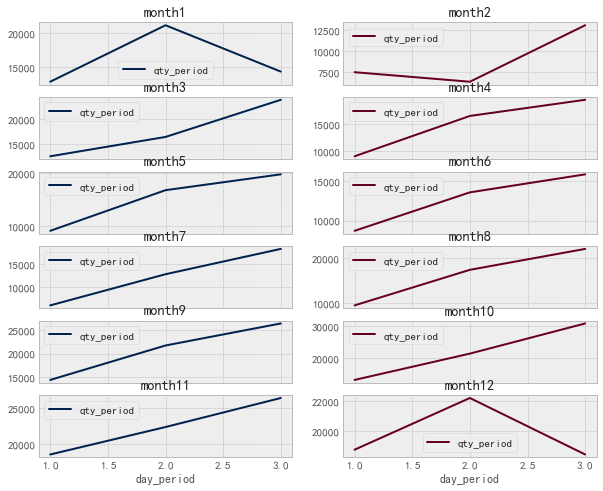

In [75]:
# 可视化不同月份不同年份同季度需求量

fig, axes = plt.subplots(6,2,sharex=True,figsize=(10,8))
qty_month1.plot(x='day_period',y='qty_period',ax=axes[0,0],colormap='cividis')
qty_month2.plot(x='day_period', y='qty_period', ax=axes[0,1],colormap='RdGy')
qty_month3.plot(x='day_period', y='qty_period', ax=axes[1,0],colormap='cividis')
qty_month4.plot(x='day_period', y='qty_period', ax=axes[1,1],colormap='RdGy')
qty_month5.plot(x='day_period', y='qty_period', ax=axes[2,0],colormap='cividis')
qty_month6.plot(x='day_period', y='qty_period', ax=axes[2,1],colormap='RdGy')
qty_month7.plot(x='day_period', y='qty_period', ax=axes[3,0],colormap='cividis')
qty_month8.plot(x='day_period', y='qty_period', ax=axes[3,1],colormap='RdGy')
qty_month9.plot(x='day_period', y='qty_period', ax=axes[4,0],colormap='cividis')
qty_month10.plot(x='day_period', y='qty_period', ax=axes[4,1],colormap='RdGy')
qty_month11.plot(x='day_period', y='qty_period', ax=axes[5,0],colormap='cividis')
qty_month12.plot(x='day_period', y='qty_period', ax=axes[5,1],colormap='RdGy')

axes[0,0].set_title('month1')
axes[0,1].set_title('month2')
axes[1,0].set_title('month3')
axes[1,1].set_title('month4')
axes[2,0].set_title('month5')
axes[2,1].set_title('month6')
axes[3,0].set_title('month7')
axes[3,1].set_title('month8')
axes[4,0].set_title('month9')
axes[4,1].set_title('month10')
axes[5,0].set_title('month11')
axes[5,1].set_title('month12')


# 特征工程

In [76]:

# # convert Date from object to datetime
# data['order_date'] = pd.to_datetime(data['order_date'], infer_datetime_format=True)
# # print info to check conversion 
# data=data.set_index(['order_date']) # set date as index or rest_index() 把日期变为索引

# # data['channel'] = 0
# # data.channel[(data.sales_chan_name == 'offline')] = 1
# # data.channel[(data.sales_chan_name == 'online')] = 2

# # data = data.drop(columns = ['sales_chan_name'])

# display(data.head())
# print(data.info())

In [77]:
#查看特定促销节日，是否存在订货交易
# 618:530-618
data[(data['day']<=18)&(data['month']==6)]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period
91956,2016-06-01,104,20437,307,403,online,248.0,8,6,2016,1,2,1
91957,2016-06-01,104,21061,308,404,online,754.0,157,6,2016,1,2,1
91958,2016-06-01,104,20862,307,403,online,551.0,10,6,2016,1,2,1
91959,2016-06-01,104,21081,307,403,online,459.0,3,6,2016,1,2,1
91960,2016-06-01,104,21986,301,405,online,353.0,4,6,2016,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465183,2018-06-18,102,20766,306,407,offline,1611.0,3,6,2018,18,2,2
465184,2018-06-18,102,21492,306,407,offline,2801.0,2,6,2018,18,2,2
465185,2018-06-18,103,20583,306,407,online,472.0,453,6,2018,18,2,2
465186,2018-06-18,102,20412,306,407,offline,2115.0,9,6,2018,18,2,2


In [78]:
data[(data['day']>=30)&(data['month']==5)]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period
90773,2016-05-30,102,21692,306,407,offline,870.0,6,5,2016,30,2,3
90774,2016-05-30,102,21517,306,407,offline,845.0,5,5,2016,30,2,3
90775,2016-05-30,103,20973,306,407,offline,547.0,52,5,2016,30,2,3
90776,2016-05-30,103,21271,306,407,offline,467.0,146,5,2016,30,2,3
90777,2016-05-30,103,20864,302,408,offline,1016.0,507,5,2016,30,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457350,2018-05-31,103,20980,303,401,offline,1287.0,76,5,2018,31,2,3
457351,2018-05-31,103,20973,306,407,offline,612.0,126,5,2018,31,2,3
457352,2018-05-31,103,20973,306,407,offline,611.0,7,5,2018,31,2,3
457353,2018-05-31,103,20207,303,401,online,1650.0,208,5,2018,31,2,3


In [79]:
#双十一一般持续20天左右 10.20-11.11
data[((data['day']>=20)&(data['month']==10))]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period
12129,2015-10-20,103,21819,306,402,offline,263.0,107,10,2015,20,4,3
12130,2015-10-20,102,20230,306,407,offline,878.0,308,10,2015,20,4,3
12131,2015-10-20,102,20895,306,407,offline,806.0,138,10,2015,20,4,3
12132,2015-10-20,102,21295,302,408,offline,788.0,108,10,2015,20,4,3
12133,2015-10-20,103,21271,306,407,offline,464.0,207,10,2015,20,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554218,2018-10-31,102,20414,308,404,offline,1562.0,49,10,2018,31,4,3
554219,2018-10-31,101,22015,304,409,offline,4055.0,14,10,2018,31,4,3
554220,2018-10-31,102,21238,308,404,offline,1554.0,240,10,2018,31,4,3
554221,2018-10-31,102,21038,308,404,offline,2060.0,52,10,2018,31,4,3


In [80]:
data[((data['day']<=11)&(data['month']==11))]

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period
15852,2015-11-01,102,21121,305,412,offline,250.0,31,11,2015,1,4,1
15853,2015-11-01,102,20694,305,412,offline,1408.0,9,11,2015,1,4,1
15854,2015-11-01,102,20140,305,412,offline,890.0,12,11,2015,1,4,1
15855,2015-11-01,102,21379,305,412,offline,985.0,8,11,2015,1,4,1
15856,2015-11-01,102,21987,305,412,offline,559.0,13,11,2015,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564089,2018-11-11,102,20555,308,404,offline,984.0,273,11,2018,11,4,2
564090,2018-11-11,102,22056,302,408,offline,984.0,88,11,2018,11,4,2
564091,2018-11-11,102,20134,305,412,offline,857.0,44,11,2018,11,4,2
564092,2018-11-11,102,20655,306,407,offline,1042.0,125,11,2018,11,4,2


In [81]:
# 双12：12.1-12.12
data[(data['day']<=12)&(data['month']==12)]


,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period
23738,2015-12-01,102,20780,306,407,offline,931.0,16,12,2015,1,4,1
23739,2015-12-01,102,20092,306,407,offline,732.0,25,12,2015,1,4,1
23740,2015-12-01,102,20973,306,407,offline,530.0,206,12,2015,1,4,1
23741,2015-12-01,102,20279,306,407,offline,642.0,21,12,2015,1,4,1
23742,2015-12-01,102,22047,306,407,offline,1006.0,22,12,2015,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591361,2018-12-12,102,22038,306,407,offline,658.4,2,12,2018,12,4,2
591362,2018-12-12,102,20328,306,407,offline,635.2,8,12,2018,12,4,2
591363,2018-12-12,102,20587,306,407,offline,666.6,7,12,2018,12,4,2
591364,2018-12-12,102,21394,306,407,offline,513.0,9,12,2018,12,4,2


In [82]:
# 构建特征--是否处于打折时间节点
data['is_sales'] = 0
data.is_sales[(data['day']<=18)&(data['month']==6)]=1
data.is_sales[(data['day']>=30)&(data['month']==5)]=1
data.is_sales[((data['day']>=20)&(data['month']==10))]=1
data.is_sales[((data['day']<=11)&(data['month']==11))]=1
data.is_sales[(data['day']<=12)&(data['month']==12)]=1

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/2799474767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.is_sales[(data['day']<=18)&(data['month']==6)]=1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/2799474767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.is_sales[(data['day']>=30)&(data['month']==5)]=1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/2799474767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

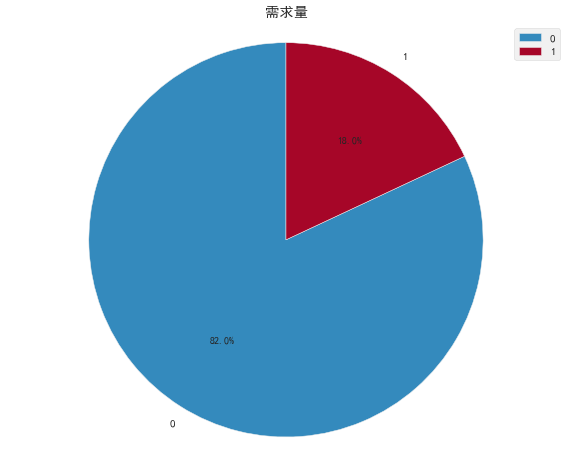

In [83]:
data_issales = data.groupby('is_sales').sum()[['ord_qty']]

# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=data_issales['ord_qty'].values,
        labels=data_issales.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

In [84]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 9627
Now column number is: 588067
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: item_price, dtype: float64
Description of data larger than the upper bound is:
count      9627.000000
mean       5491.047949
std        6599.179742
min        3371.800000
25%        3708.000000
50%        4390.000000
75%        6008.000000
max      260014.000000
Name: item_price, dtype: float64


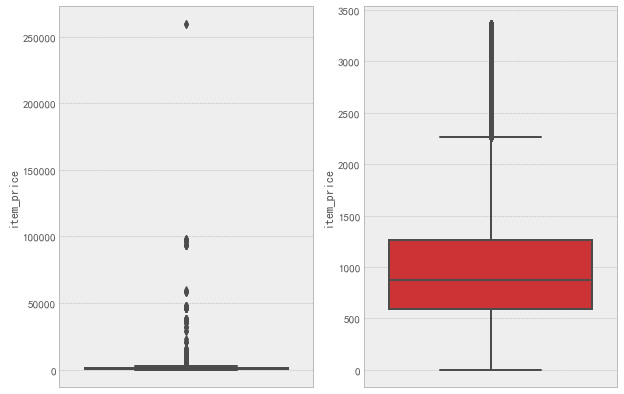

In [85]:

data = outliers_proc(data, 'item_price', scale=3)

## 数据分桶
对价格分桶

In [86]:
data['item_price']
bin = [i*10 for i in range(150)]
data['price_bin'] = pd.cut(data['item_price'], 10, labels=False)
data[['price_bin', 'item_price']].head()

,price_bin,item_price
0,3,1114.0
1,3,1012.0
2,1,428.0
3,2,962.0
4,4,1400.0


In [87]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,day,season,day_period,is_sales,price_bin
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,1,3,1,0,3
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,1,3,1,0,3
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,2,3,1,0,1
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,2,3,1,0,2
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,2,3,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,20,4,3,0,2
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,20,4,3,0,2
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,20,4,3,0,5
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,20,4,3,0,6


In [88]:
# 计算同一区域第一大类和第二大类的需求统计量
# 这里要以 train 的数据计算统计量
train_cate = data.groupby("first_cate_code")
all_info = {}
for kind, kind_data in train_cate:
    info = {}
    kind_data = kind_data[kind_data['ord_qty'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_qty_max'] = kind_data.ord_qty.max()
    info['brand_qty_median'] = kind_data.ord_qty.median()
    info['brand_qty_min'] = kind_data.ord_qty.min()
    info['brand_qty_sum'] = kind_data.ord_qty.sum()
    info['brand_qty_std'] = kind_data.ord_qty.std()
    info['brand_qty_average'] = round(kind_data.ord_qty.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "first_cate_code"})
data = data.merge(brand_fe, how='left', on='first_cate_code')

In [89]:
data
data['channel'] = 0

data.channel[(data.sales_chan_name == 'offline')] = 1
data.channel[(data.sales_chan_name == 'online')] = 2

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/968891185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.channel[(data.sales_chan_name == 'offline')] = 1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/968891185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.channel[(data.sales_chan_name == 'online')] = 2


In [90]:
#构造星期特征
data['week'] = data['order_date'].dt.weekday + 1
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,price_bin,brand_amount,brand_qty_max,brand_qty_median,brand_qty_min,brand_qty_sum,brand_qty_std,brand_qty_average,channel,week
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,3,50848.0,10547.0,41.0,1.0,5729517.0,228.246893,112.68,1,2
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,3,21451.0,3604.0,28.0,1.0,1586654.0,142.820419,73.96,1,2
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,1,50848.0,10547.0,41.0,1.0,5729517.0,228.246893,112.68,2,3
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,2,53848.0,9874.0,42.0,1.0,5993559.0,205.228423,111.30,2,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,4,50848.0,10547.0,41.0,1.0,5729517.0,228.246893,112.68,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,2,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,2,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,5,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,6,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4


In [91]:
data['is_work_day'] = np.where(data['week'].isin([6,7]), 0, 1) # 是否工作日

In [92]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_amount,brand_qty_max,brand_qty_median,brand_qty_min,brand_qty_sum,brand_qty_std,brand_qty_average,channel,week,is_work_day
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,50848.0,10547.0,41.0,1.0,5729517.0,228.246893,112.68,1,2,1
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,21451.0,3604.0,28.0,1.0,1586654.0,142.820419,73.96,1,2,1
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,50848.0,10547.0,41.0,1.0,5729517.0,228.246893,112.68,2,3,1
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,53848.0,9874.0,42.0,1.0,5993559.0,205.228423,111.30,2,3,1
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,50848.0,10547.0,41.0,1.0,5729517.0,228.246893,112.68,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4,1
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4,1
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4,1
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,92995.0,9140.0,24.0,1.0,6207933.0,149.398749,66.75,1,4,1


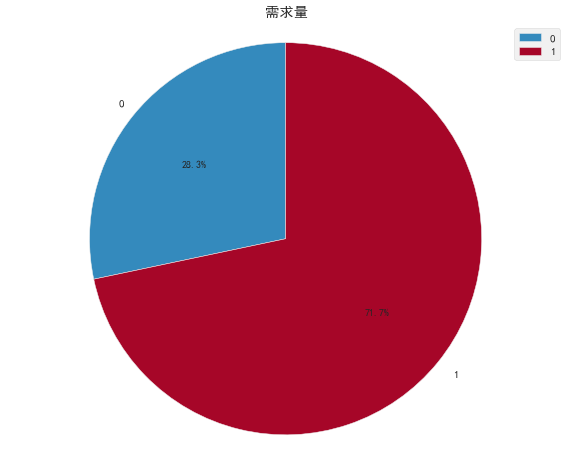

In [93]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
data_is_workday = data.groupby('is_work_day').sum()[['ord_qty']]

# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=data_is_workday['ord_qty'].values,
        labels=data_is_workday.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

In [94]:
# 特殊日子/公众假日
special_day = ['2015-09-27','2015-10-01','2015-10-02','2015-10-02','2015-10-03','2015-10-04','2015-10-05','2015-10-06','2015-10-07','2016-01-01','2016-01-02','2016-01-03','2016-02-07','2016-02-08','2016-02-09','2016-02-10','2016-02-11','2016-02-12','2016-02-13','2016-04-04','2016-04-02','2016-04-03','2016-05-01','2016-06-09','2016-06-10','2016-06-11',
              '2016-09-15','2016-09-16','2016-09-17','2016-10-01','2016-10-02','2016-10-02','2016-10-03','2016-10-04','2016-10-05','2016-10-06','2016-10-07','2017-01-01','2017-1-27','2017-1-28','2017-01-29','2017-01-30','2017-01-31',
              '2017-02-01','2017-02-02','2017-04-02','2017-04-03','2017-04-04','2017-04-29','2017-04-30','2017-05-01','2017-05-28','2017-05-29','2017-05-30','2017-10-01','2017-10-02','2017-10-02','2017-10-03','2017-10-04','2017-10-05','2017-10-06','2017-10-07','2017-01-08',
              '2017-12-30','2017-12-31','2018-01-01','2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21','2018-04-05','2018-04-06','2018-04-07','2018-04-29','2018-04-30','2018-05-01','2018-06-16','2018-06-17','2018-06-18',
              '2018-09-22','2018-09-23','2018-09-24','2018-10-01','2018-10-02','2018-10-02','2018-10-03','2018-10-04','2018-10-05','2018-10-06','2018-10-07']
data['is_special_day'] = np.where(data['order_date'].isin(special_day), 1, 0)

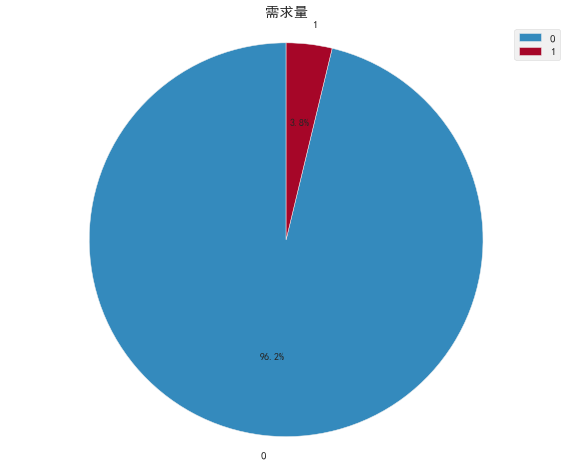

In [95]:
is_specialday = data.groupby('is_special_day').sum()[['ord_qty']]

# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=is_specialday['ord_qty'].values,
        labels=is_specialday.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("需求量")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

In [96]:
# 是否月初

data['is_month_start'] = np.where(data['order_date'].dt.is_month_start, 1, 0)
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_median,brand_qty_min,brand_qty_sum,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,41.0,1.0,5729517.0,228.246893,112.68,1,2,1,0,1
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,28.0,1.0,1586654.0,142.820419,73.96,1,2,1,0,1
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,41.0,1.0,5729517.0,228.246893,112.68,2,3,1,0,0
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,42.0,1.0,5993559.0,205.228423,111.30,2,3,1,0,0
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,41.0,1.0,5729517.0,228.246893,112.68,1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,24.0,1.0,6207933.0,149.398749,66.75,1,4,1,0,0
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,24.0,1.0,6207933.0,149.398749,66.75,1,4,1,0,0
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,24.0,1.0,6207933.0,149.398749,66.75,1,4,1,0,0
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,24.0,1.0,6207933.0,149.398749,66.75,1,4,1,0,0


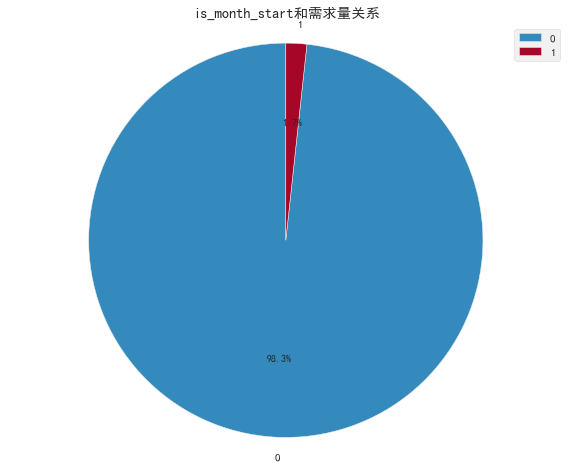

In [97]:
is_monthstart = data.groupby('is_month_start').sum()[['ord_qty']]

# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=is_monthstart['ord_qty'].values,
        labels=is_monthstart.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("is_month_start和需求量关系")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

In [98]:
# 是否月末

data['is_month_end'] = np.where(data['order_date'].dt.is_month_end, 1, 0)
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_min,brand_qty_sum,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,1.0,5729517.0,228.246893,112.68,1,2,1,0,1,0
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,1.0,1586654.0,142.820419,73.96,1,2,1,0,1,0
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,1.0,5729517.0,228.246893,112.68,2,3,1,0,0,0
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,1.0,5993559.0,205.228423,111.30,2,3,1,0,0,0
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,1.0,5729517.0,228.246893,112.68,1,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,1.0,6207933.0,149.398749,66.75,1,4,1,0,0,0
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,1.0,6207933.0,149.398749,66.75,1,4,1,0,0,0
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,1.0,6207933.0,149.398749,66.75,1,4,1,0,0,0
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,1.0,6207933.0,149.398749,66.75,1,4,1,0,0,0


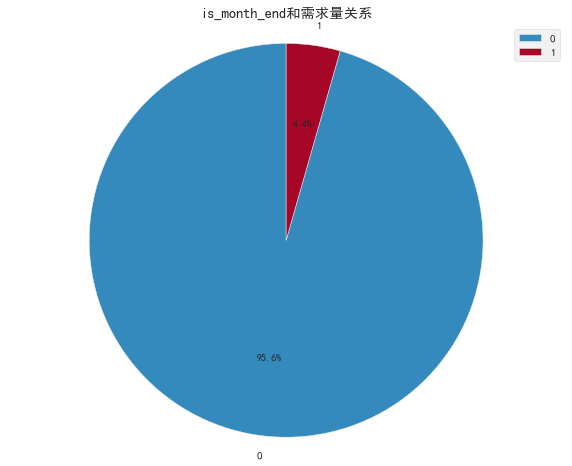

In [99]:
is_monthend = data.groupby('is_month_end').sum()[['ord_qty']]

# 设置图框的大小
fig = plt.figure(figsize=(10,8))
# 前两个1表示共有1*1个子图，最后一个1表示第1个子图
ax = fig.add_subplot(1,1,1)

# 绘制饼图，textprops={'fontproperties':font}显示中文
plt.pie(x=is_monthend['ord_qty'].values,
        labels=is_monthend.index,
        autopct='%.1f%%',
        shadow=False,
        startangle=90,
        center = (3,3))

# 添加标题，fontproperties=font显示中文
plt.title("is_month_end和需求量关系")
# 显示图例，prop=font显示中文
plt.legend()
# 饼图保持圆形
plt.axis('equal')
# 显示图像
plt.show()

In [100]:
data['weekofyear'] = data['order_date'].dt.week
data

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/3152780950.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['weekofyear'] = data['order_date'].dt.week


,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_sum,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,5729517.0,228.246893,112.68,1,2,1,0,1,0,36
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,1586654.0,142.820419,73.96,1,2,1,0,1,0,36
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,5729517.0,228.246893,112.68,2,3,1,0,0,0,36
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,5993559.0,205.228423,111.30,2,3,1,0,0,0,36
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,5729517.0,228.246893,112.68,1,3,1,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,51
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,51
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,51
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,51


In [101]:
# 判断当前周是否包含假期
special_day = ['2015-09-27','2015-10-01','2015-10-02','2015-10-02','2015-10-03','2015-10-04','2015-10-05','2015-10-06','2015-10-07','2016-01-01','2016-01-02','2016-01-03','2016-02-07','2016-02-08','2016-02-09','2016-02-10','2016-02-11','2016-02-12','2016-02-13','2016-04-04','2016-04-02','2016-04-03','2016-05-01','2016-06-09','2016-06-10','2016-06-11',
              '2016-09-15','2016-09-16','2016-09-17','2016-10-01','2016-10-02','2016-10-02','2016-10-03','2016-10-04','2016-10-05','2016-10-06','2016-10-07','2017-01-01','2017-1-27','2017-1-28','2017-01-29','2017-01-30','2017-01-31',
              '2017-02-01','2017-02-02','2017-04-02','2017-04-03','2017-04-04','2017-04-29','2017-04-30','2017-05-01','2017-05-28','2017-05-29','2017-05-30','2017-10-01','2017-10-02','2017-10-02','2017-10-03','2017-10-04','2017-10-05','2017-10-06','2017-10-07','2017-01-08',
              '2017-12-30','2017-12-31','2018-01-01','2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21','2018-04-05','2018-04-06','2018-04-07','2018-04-29','2018-04-30','2018-05-01','2018-06-16','2018-06-17','2018-06-18',
              '2018-09-22','2018-09-23','2018-09-24','2018-10-01','2018-10-02','2018-10-02','2018-10-03','2018-10-04','2018-10-05','2018-10-06','2018-10-07']
# special_week=[39,40,41,53]
data['is_special_week'] = 0

In [102]:
data['is_special_week'][((data['week'] == 39 )& (data['year'] == 2015))] =1
data['is_special_week'][((data['week'] == 40 )& (data['year'] == 2015))] =1
data['is_special_week'][((data['week'] == 41 )& (data['year'] == 2015))] =1
data['is_special_week'][((data['week'] == 53 )& (data['year'] == 2015))] =1

data['is_special_week'][((data['week'] == 1 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 5 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 13 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 17 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 23 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 37 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 39 )& (data['year'] == 2016))] =1
data['is_special_week'][((data['week'] == 40 )& (data['year'] == 2016))] =1

data['is_special_week'][((data['week'] == 4 )& (data['year'] == 2017))] =1
data['is_special_week'][((data['week'] == 5 )& (data['year'] == 2017))] =1
data['is_special_week'][((data['week'] == 14 )& (data['year'] == 2017))] =1
data['is_special_week'][((data['week'] == 17 )& (data['year'] == 2017))] =1
data['is_special_week'][((data['week'] == 18 )& (data['year'] == 2017))] =1
data['is_special_week'][((data['week'] == 22 )& (data['year'] == 2017))] =1
data['is_special_week'][((data['week'] == 40 )& (data['year'] == 2017))] =1

data['is_special_week'][((data['week'] == 1 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 7 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 8 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 14 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 18 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 24 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 38 )& (data['year'] == 2018))] =1
data['is_special_week'][((data['week'] == 40 )& (data['year'] == 2018))] =1

C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1925071692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_special_week'][((data['week'] == 39 )& (data['year'] == 2015))] =1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1925071692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_special_week'][((data['week'] == 40 )& (data['year'] == 2015))] =1
C:\Users\14121\AppData\Local\Temp/ipykernel_14852/1925071692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [103]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,228.246893,112.68,1,2,1,0,1,0,36,0
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,142.820419,73.96,1,2,1,0,1,0,36,0
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,228.246893,112.68,2,3,1,0,0,0,36,0
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,205.228423,111.30,2,3,1,0,0,0,36,0
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,228.246893,112.68,1,3,1,0,0,0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0


In [107]:
# df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','year','month'], as_index=False).agg({'ord_qty': 'sum'})

In [108]:
# 构造日需求量差异值
# df = pd.read_csv('shampoo-sales.csv')
# df.dropna(inplace=True)df.rename(columns={'Sales of shampoo over a three year period': 'value'}, inplace=True)
data['day_diffs'] = data['ord_qty'].shift(1) - data['ord_qty'].shift(2)

In [109]:
data['day_diffs'] = data['day_diffs'].fillna(0)
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week,day_diffs
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,112.68,1,2,1,0,1,0,36,0,0.0
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,73.96,1,2,1,0,1,0,36,0,0.0
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,112.68,2,3,1,0,0,0,36,0,-7.0
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,111.30,2,3,1,0,0,0,36,0,97.0
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,112.68,1,3,1,0,0,0,36,0,-106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,66.75,1,4,1,0,0,0,51,0,-898.0
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,66.75,1,4,1,0,0,0,51,0,-49.0
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,66.75,1,4,1,0,0,0,51,0,443.0
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,66.75,1,4,1,0,0,0,51,0,-396.0


In [110]:
data.columns

Index(['order_date', 'sales_region_code', 'item_code', 'first_cate_code',
       'second_cate_code', 'sales_chan_name', 'item_price', 'ord_qty', 'month',
       'year', 'day', 'season', 'day_period', 'is_sales', 'price_bin',
       'brand_amount', 'brand_qty_max', 'brand_qty_median', 'brand_qty_min',
       'brand_qty_sum', 'brand_qty_std', 'brand_qty_average', 'channel',
       'week', 'is_work_day', 'is_special_day', 'is_month_start',
       'is_month_end', 'weekofyear', 'is_special_week', 'day_diffs'],
      dtype='object')

In [111]:
data_drop = data.drop(['item_price','sales_chan_name'],axis=1)

In [117]:
data['quarter']

0         3
1         3
2         3
3         3
4         3
         ..
597689    4
597690    4
597691    4
597692    4
597693    4
Name: quarter, Length: 597694, dtype: int16

In [162]:

# 月粒度
df = data.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','week','item_price','brand_qty_average']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','year','month','brand_qty_average'], as_index=False).agg({'brand_qty_average': 'mean'})
from datetime import datetime
import pandas as pd
df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('month_sum4.csv')

In [126]:
df_sum

,sales_region_code,item_code,first_cate_code,second_cate_code,year,month,brand_qty_max,order_date
0,101,20001,302,408,2016,3,9140.0,2016-03-01
1,101,20001,302,408,2016,5,9140.0,2016-05-01
2,101,20002,303,406,2017,8,3653.0,2017-08-01
3,101,20002,303,406,2018,3,3653.0,2018-03-01
4,101,20002,303,406,2018,4,3653.0,2018-04-01
...,...,...,...,...,...,...,...,...
56155,105,22084,302,408,2017,12,9140.0,2017-12-01
56156,105,22084,302,408,2018,1,9140.0,2018-01-01
56157,105,22084,302,408,2018,8,9140.0,2018-08-01
56158,105,22084,302,408,2018,9,9140.0,2018-09-01


In [322]:
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','year','month'], as_index=False).agg({'item_price': 'mean'})
df_sum.to_csv('month_sum1.csv')

In [325]:
df_sum = pd.read_csv('month_sum.csv')

In [326]:
# 在这个之后 用滑窗
df_sum

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,year,month,ord_qty,item_price
0,2016-3-1,20001,101,302,408,2016,3,397,698.400000
1,2016-5-1,20001,101,302,408,2016,5,511,708.000000
2,2017-8-1,20002,101,303,406,2017,8,4,1958.000000
3,2018-3-1,20002,101,303,406,2018,3,17,2386.750000
4,2018-4-1,20002,101,303,406,2018,4,124,2184.500000
...,...,...,...,...,...,...,...,...,...
56155,2017-12-1,22084,105,302,408,2017,12,16,992.000000
56156,2018-1-1,22084,105,302,408,2018,1,17,998.000000
56157,2018-8-1,22084,105,302,408,2018,8,173,847.500000
56158,2018-9-1,22084,105,302,408,2018,9,122,911.333333


In [329]:
# 月份滑窗设为1
def create_feature(sale_data, is_train=True, day=None):
    # 可以在这里加入更多的特征抽取方法
    # 获取7天前的数据，28天前的数据
    lags = [1]
    lag_cols = [f"lag_{lag}" for lag in lags ]

    # 如果是测试集只需要计算一天的特征，减少计算量
    # 注意训练集和测试集特征生成要一致
    if is_train:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data[lag_col] = sale_data[["item_code","ord_qty"]].groupby("item_code")["ord_qty"].shift(lag)
    else:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data.loc[sale_data.date == day, lag_col] = sale_data.loc[sale_data.date ==day-timedelta(days=lag), 'sales'].values  


    # 将获取7天前的数据，28天前的数据做移动平均
    wins = [1]

    if is_train:
        for win in wins :
            for lag,lag_col in zip(lags, lag_cols):
                sale_data[f"rmean_{lag}_{win}"] = sale_data[["item_code", lag_col]].groupby("item_code")[lag_col].transform(lambda x : x.rolling(win).mean())
    else:
        for win in wins:
            for lag in lags:
                df_window = sale_data[(sale_data.date <= day-timedelta(days=lag)) & (sale_data.date > day-timedelta(days=lag+win))]
                df_window_grouped = df_window.groupby("item_code").agg({'ord_qty':'mean'}).reindex(sale_data.loc[sale_data.date==day,'item_code'])
                sale_data.loc[sale_data.date == day,f"rmean_{lag}_{win}"] = df_window_grouped.sales.values   

#     # 处理时间特征
#     # 有的时间特征没有，通过datetime的方法自动生成
#     date_features = {
#             "wday": "weekday",
#             "week": "weekofyear",
#             "month": "month",
#             "quarter": "quarter",
#             "year": "year",
#             "mday": "day",
#         }

#     for date_feat_name, date_feat_func in date_features.items():
#         if date_feat_name in sale_data.columns:
#             sale_data[date_feat_name] = sale_data[date_feat_name].astype("int16")
#         else:
#             sale_data[date_feat_name] = getattr(sale_data["order_date"].dt, date_feat_func).astype("int16")
    return sale_data

In [330]:
df_sum = create_feature(df_sum)
df_sum

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,year,month,ord_qty,item_price,lag_1,rmean_1_1
0,2016-3-1,20001,101,302,408,2016,3,397,698.400000,NaN,NaN
1,2016-5-1,20001,101,302,408,2016,5,511,708.000000,397.0,397.0
2,2017-8-1,20002,101,303,406,2017,8,4,1958.000000,NaN,NaN
3,2018-3-1,20002,101,303,406,2018,3,17,2386.750000,4.0,4.0
4,2018-4-1,20002,101,303,406,2018,4,124,2184.500000,17.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
56155,2017-12-1,22084,105,302,408,2017,12,16,992.000000,15.0,15.0
56156,2018-1-1,22084,105,302,408,2018,1,17,998.000000,16.0,16.0
56157,2018-8-1,22084,105,302,408,2018,8,173,847.500000,17.0,17.0
56158,2018-9-1,22084,105,302,408,2018,9,122,911.333333,173.0,173.0


In [332]:
df_sum = df_sum.fillna(0)

In [333]:
df_sum.to_csv('month_sum2.csv')

In [ ]:
sale_data = create_feature(data_drop)

In [331]:
data = sale_data.fillna(0)

In [ ]:
# 周粒度

In [409]:

train_df = data.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','item_price','brand_qty_']]
train_df['week'] = data['order_date'].dt.week
train_df = train_df.groupby(['year','month','week','sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'ord_qty': 'sum'})
train_df['order_date'] = train_df['year']*100 + train_df['month']
train_df
train_df['order_date'] = train_df['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())
train_df.to_csv('week_sum.csv')
train_df

C:\Users\14121\AppData\Local\Temp/ipykernel_17828/267268428.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['week'] = data['order_date'].dt.week


,year,month,week,sales_region_code,item_code,first_cate_code,second_cate_code,ord_qty,order_date
0,2015,9,36,101,20007,305,412,54,2015-09-01
1,2015,9,36,101,20020,305,412,18,2015-09-01
2,2015,9,36,101,20082,305,412,39,2015-09-01
3,2015,9,36,101,20092,306,407,388,2015-09-01
4,2015,9,36,101,20096,306,407,66,2015-09-01
...,...,...,...,...,...,...,...,...,...
154332,2018,12,51,105,22058,302,408,85,2018-12-01
154333,2018,12,51,105,22059,305,412,7,2018-12-01
154334,2018,12,51,105,22066,307,403,618,2018-12-01
154335,2018,12,51,105,22072,305,412,248,2018-12-01


In [163]:
from datetime import datetime
train_df = data.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','item_price','is_special_week','brand_qty_average']]
train_df['week'] = data['order_date'].dt.week
train_df['order_date'] = train_df['year']*100 + train_df['month']
train_df
train_df['order_date'] = train_df['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())
train_df = train_df.groupby(['year','month','week','sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
train_df.to_csv('week_sum4.csv')

C:\Users\14121\AppData\Local\Temp/ipykernel_7004/3462709828.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['week'] = data['order_date'].dt.week


In [133]:
train_df

,year,month,week,sales_region_code,item_code,first_cate_code,second_cate_code,brand_qty_sum
0,2015,9,36,101,20007,305,412,6323489.0
1,2015,9,36,101,20020,305,412,6323489.0
2,2015,9,36,101,20082,305,412,6323489.0
3,2015,9,36,101,20092,306,407,24546436.0
4,2015,9,36,101,20096,306,407,24546436.0
...,...,...,...,...,...,...,...,...
154332,2018,12,51,105,22058,302,408,6207933.0
154333,2018,12,51,105,22059,305,412,6323489.0
154334,2018,12,51,105,22066,307,403,5729517.0
154335,2018,12,51,105,22072,305,412,6323489.0


In [411]:
train_df2 = pd.read_csv('week_sum.csv')

In [412]:
# 周滑窗设为4，即四周前数据
def create_feature(sale_data, is_train=True, day=None):
    # 可以在这里加入更多的特征抽取方法
    # 获取四周前
    lags = [4]
    lag_cols = [f"lag_{lag}" for lag in lags ]

    # 如果是测试集只需要计算一天的特征，减少计算量
    # 注意训练集和测试集特征生成要一致
    if is_train:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data[lag_col] = sale_data[["item_code","ord_qty"]].groupby("item_code")["ord_qty"].shift(lag)
    else:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data.loc[sale_data.date == day, lag_col] = sale_data.loc[sale_data.date ==day-timedelta(days=lag), 'sales'].values  


    # 将获取7天前的数据，28天前的数据做移动平均
    wins = [4]

    if is_train:
        for win in wins :
            for lag,lag_col in zip(lags, lag_cols):
                sale_data[f"rmean_{lag}_{win}"] = sale_data[["item_code", lag_col]].groupby("item_code")[lag_col].transform(lambda x : x.rolling(win).mean())
    else:
        for win in wins:
            for lag in lags:
                df_window = sale_data[(sale_data.date <= day-timedelta(days=lag)) & (sale_data.date > day-timedelta(days=lag+win))]
                df_window_grouped = df_window.groupby("item_code").agg({'ord_qty':'mean'}).reindex(sale_data.loc[sale_data.date==day,'item_code'])
                sale_data.loc[sale_data.date == day,f"rmean_{lag}_{win}"] = df_window_grouped.sales.values   

#     # 处理时间特征
#     # 有的时间特征没有，通过datetime的方法自动生成
#     date_features = {
#             "wday": "weekday",
#             "week": "weekofyear",
#             "month": "month",
#             "quarter": "quarter",
#             "year": "year",
#             "mday": "day",
#         }

#     for date_feat_name, date_feat_func in date_features.items():
#         if date_feat_name in sale_data.columns:
#             sale_data[date_feat_name] = sale_data[date_feat_name].astype("int16")
#         else:
#             sale_data[date_feat_name] = getattr(sale_data["order_date"].dt, date_feat_func).astype("int16")
    return sale_data

In [413]:
train_df = create_feature(train_df)
train_df

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,month,week,item_price,ord_qty,lag_4,rmean_4_4
0,2015-9-1,20007,101,305,412,9,36,98.000000,54,NaN,NaN
1,2015-9-1,20020,101,305,412,9,36,1918.000000,18,NaN,NaN
2,2015-9-1,20082,101,305,412,9,36,1161.500000,39,NaN,NaN
3,2015-9-1,20092,101,306,407,9,36,731.000000,388,NaN,NaN
4,2015-9-1,20096,101,306,407,9,36,950.000000,66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
154332,2018-12-1,22058,105,302,408,12,51,1379.571429,85,76.0,69.25
154333,2018-12-1,22059,105,305,412,12,51,453.000000,7,27.0,35.25
154334,2018-12-1,22066,105,307,403,12,51,336.000000,618,102.0,928.00
154335,2018-12-1,22072,105,305,412,12,51,427.000000,248,657.0,460.50


In [417]:
train_df = train_df.fillna(0)
train_df.to_csv('week_sum2.csv')

In [418]:
train_df

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,month,week,item_price,ord_qty,lag_4,rmean_4_4
0,2015-9-1,20007,101,305,412,9,36,98.000000,54,0.0,0.00
1,2015-9-1,20020,101,305,412,9,36,1918.000000,18,0.0,0.00
2,2015-9-1,20082,101,305,412,9,36,1161.500000,39,0.0,0.00
3,2015-9-1,20092,101,306,407,9,36,731.000000,388,0.0,0.00
4,2015-9-1,20096,101,306,407,9,36,950.000000,66,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
154332,2018-12-1,22058,105,302,408,12,51,1379.571429,85,76.0,69.25
154333,2018-12-1,22059,105,305,412,12,51,453.000000,7,27.0,35.25
154334,2018-12-1,22066,105,307,403,12,51,336.000000,618,102.0,928.00
154335,2018-12-1,22072,105,305,412,12,51,427.000000,248,657.0,460.50


In [423]:
data

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_sum,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,day_diffs
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,5729517.0,228.246893,112.68,1,2,1,0,1,0,0.0
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,1586654.0,142.820419,73.96,1,2,1,0,1,0,0.0
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,5729517.0,228.246893,112.68,2,3,1,0,0,0,-7.0
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,5993559.0,205.228423,111.30,2,3,1,0,0,0,97.0
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,5729517.0,228.246893,112.68,1,3,1,0,0,0,-106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,-898.0
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,-49.0
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,443.0
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,6207933.0,149.398749,66.75,1,4,1,0,0,0,-396.0


In [424]:
day_df = data.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','is_work_day','is_special_day','is_month_start','is_month_end']]
day_df['day'] = data['order_date'].dt.day
day_df = day_df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','year','month','day'], as_index=False).agg({'ord_qty': 'sum'})
day_df

,sales_region_code,item_code,first_cate_code,second_cate_code,year,month,day,ord_qty
0,101,20001,302,408,2016,3,15,102
1,101,20001,302,408,2016,3,21,19
2,101,20001,302,408,2016,3,23,36
3,101,20001,302,408,2016,3,24,204
4,101,20001,302,408,2016,3,25,36
...,...,...,...,...,...,...,...,...
376471,105,22084,302,408,2018,8,25,10
376472,105,22084,302,408,2018,9,12,106
376473,105,22084,302,408,2018,9,22,5
376474,105,22084,302,408,2018,9,30,11


In [164]:
day_df = data.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','is_work_day','is_special_day','is_month_start','is_month_end','brand_qty_average']]
day_df['day'] = data['order_date'].dt.day
day_df = day_df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','year','month','day'], as_index=False).agg({'brand_qty_average': 'mean'})
day_df.to_csv('day_sum4.csv')
day_df

,sales_region_code,item_code,first_cate_code,second_cate_code,year,month,day,brand_qty_average
0,101,20001,302,408,2016,3,15,66.75
1,101,20001,302,408,2016,3,21,66.75
2,101,20001,302,408,2016,3,23,66.75
3,101,20001,302,408,2016,3,24,66.75
4,101,20001,302,408,2016,3,25,66.75
...,...,...,...,...,...,...,...,...
376471,105,22084,302,408,2018,8,25,66.75
376472,105,22084,302,408,2018,9,12,66.75
376473,105,22084,302,408,2018,9,22,66.75
376474,105,22084,302,408,2018,9,30,66.75


In [434]:
day_df.to_csv('day_sum3.csv')

In [396]:
day_df['order_date'] = day_df['year']*10000 + day_df['month']*100+day_df['day']
day_df['order_date'] = day_df['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').date())
day_df.to_csv('day_sum.csv')

In [388]:
day_df = data.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','item_price']]
day_df['day'] = data['order_date'].dt.day
day_df = day_df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','year','month','day'], as_index=False).agg({'item_price': 'mean'})
day_df

,sales_region_code,item_code,first_cate_code,second_cate_code,year,month,day,item_price
0,101,20001,302,408,2016,3,15,700.0
1,101,20001,302,408,2016,3,21,705.0
2,101,20001,302,408,2016,3,23,702.0
3,101,20001,302,408,2016,3,24,692.0
4,101,20001,302,408,2016,3,25,693.0
...,...,...,...,...,...,...,...,...
376471,105,22084,302,408,2018,8,25,1038.0
376472,105,22084,302,408,2018,9,12,659.0
376473,105,22084,302,408,2018,9,22,1034.0
376474,105,22084,302,408,2018,9,30,1041.0


In [389]:
day_df['order_date'] = day_df['year']*10000 + day_df['month']*100+day_df['day']
day_df

,sales_region_code,item_code,first_cate_code,second_cate_code,year,month,day,item_price,order_date
0,101,20001,302,408,2016,3,15,700.0,20160315
1,101,20001,302,408,2016,3,21,705.0,20160321
2,101,20001,302,408,2016,3,23,702.0,20160323
3,101,20001,302,408,2016,3,24,692.0,20160324
4,101,20001,302,408,2016,3,25,693.0,20160325
...,...,...,...,...,...,...,...,...,...
376471,105,22084,302,408,2018,8,25,1038.0,20180825
376472,105,22084,302,408,2018,9,12,659.0,20180912
376473,105,22084,302,408,2018,9,22,1034.0,20180922
376474,105,22084,302,408,2018,9,30,1041.0,20180930


In [390]:
day_df['order_date'] = day_df['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').date())

In [391]:
day_df.to_csv('day_sum1.csv')

In [397]:
day_df = pd.read_csv('day_sum.csv')

In [398]:
day_df

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,year,month,day,item_price,ord_qty
0,2016-3-15,20001,101,302,408,2016,3,15,700.0,102
1,2016-3-21,20001,101,302,408,2016,3,21,705.0,19
2,2016-3-23,20001,101,302,408,2016,3,23,702.0,36
3,2016-3-24,20001,101,302,408,2016,3,24,692.0,204
4,2016-3-25,20001,101,302,408,2016,3,25,693.0,36
...,...,...,...,...,...,...,...,...,...,...
376471,2018-8-25,22084,105,302,408,2018,8,25,1038.0,10
376472,2018-9-12,22084,105,302,408,2018,9,12,659.0,106
376473,2018-9-22,22084,105,302,408,2018,9,22,1034.0,5
376474,2018-9-30,22084,105,302,408,2018,9,30,1041.0,11


In [399]:
# 日滑窗设为30，即四周前数据
def create_feature(sale_data, is_train=True, day=None):
    # 可以在这里加入更多的特征抽取方法
    # 获取四周前
    lags = [30]
    lag_cols = [f"lag_{lag}" for lag in lags ]

    # 如果是测试集只需要计算一天的特征，减少计算量
    # 注意训练集和测试集特征生成要一致
    if is_train:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data[lag_col] = sale_data[["item_code","ord_qty"]].groupby("item_code")["ord_qty"].shift(lag)
    else:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data.loc[sale_data.date == day, lag_col] = sale_data.loc[sale_data.date ==day-timedelta(days=lag), 'sales'].values  


    # 将获取7天前的数据，28天前的数据做移动平均
    wins = [30]

    if is_train:
        for win in wins :
            for lag,lag_col in zip(lags, lag_cols):
                sale_data[f"rmean_{lag}_{win}"] = sale_data[["item_code", lag_col]].groupby("item_code")[lag_col].transform(lambda x : x.rolling(win).mean())
    else:
        for win in wins:
            for lag in lags:
                df_window = sale_data[(sale_data.date <= day-timedelta(days=lag)) & (sale_data.date > day-timedelta(days=lag+win))]
                df_window_grouped = df_window.groupby("item_code").agg({'ord_qty':'mean'}).reindex(sale_data.loc[sale_data.date==day,'item_code'])
                sale_data.loc[sale_data.date == day,f"rmean_{lag}_{win}"] = df_window_grouped.sales.values   

#     # 处理时间特征
#     # 有的时间特征没有，通过datetime的方法自动生成
#     date_features = {
#             "wday": "weekday",
#             "week": "weekofyear",
#             "month": "month",
#             "quarter": "quarter",
#             "year": "year",
#             "mday": "day",
#         }

#     for date_feat_name, date_feat_func in date_features.items():
#         if date_feat_name in sale_data.columns:
#             sale_data[date_feat_name] = sale_data[date_feat_name].astype("int16")
#         else:
#             sale_data[date_feat_name] = getattr(sale_data["order_date"].dt, date_feat_func).astype("int16")
    return sale_data

In [400]:
day_df = create_feature(day_df)
day_df

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,year,month,day,item_price,ord_qty,lag_30,rmean_30_30
0,2016-3-15,20001,101,302,408,2016,3,15,700.0,102,NaN,NaN
1,2016-3-21,20001,101,302,408,2016,3,21,705.0,19,NaN,NaN
2,2016-3-23,20001,101,302,408,2016,3,23,702.0,36,NaN,NaN
3,2016-3-24,20001,101,302,408,2016,3,24,692.0,204,NaN,NaN
4,2016-3-25,20001,101,302,408,2016,3,25,693.0,36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
376471,2018-8-25,22084,105,302,408,2018,8,25,1038.0,10,7.0,51.966667
376472,2018-9-12,22084,105,302,408,2018,9,12,659.0,106,58.0,53.633333
376473,2018-9-22,22084,105,302,408,2018,9,22,1034.0,5,2.0,53.300000
376474,2018-9-30,22084,105,302,408,2018,9,30,1041.0,11,34.0,49.266667


In [401]:
day_df = day_df.fillna(0)
day_df.to_csv('day_sum2.csv')

In [404]:
# day_df['dayofyear'] = day_df['order_date'].dt.dayofyea

In [175]:
# 测试月1
qty_test_month = data.loc[data['month'] == 1,:]
qty_test_month

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week
35438,2016-01-02,102,20037,302,408,offline,2202.0,11,1,2016,...,149.398749,66.75,1,6,0,1,0,0,53,0
35439,2016-01-02,104,21061,308,404,online,644.0,17,1,2016,...,205.228423,111.30,2,6,0,1,0,0,53,0
35440,2016-01-02,103,20230,306,407,offline,861.0,156,1,2016,...,232.676021,112.20,1,6,0,1,0,0,53,0
35441,2016-01-02,102,22022,302,408,offline,1507.0,8,1,2016,...,149.398749,66.75,1,6,0,1,0,0,53,0
35442,2016-01-02,103,20964,306,407,offline,1314.0,51,1,2016,...,232.676021,112.20,1,6,0,1,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393932,2018-01-31,102,21468,305,412,offline,316.0,53,1,2018,...,199.525576,84.39,1,3,1,0,0,1,5,0
393933,2018-01-31,102,21917,305,412,offline,452.0,9,1,2018,...,199.525576,84.39,1,3,1,0,0,1,5,0
393934,2018-01-31,102,22028,305,412,offline,367.0,48,1,2018,...,199.525576,84.39,1,3,1,0,0,1,5,0
393935,2018-01-31,102,21974,306,407,offline,1136.0,102,1,2018,...,232.676021,112.20,1,3,1,0,0,1,5,0


In [183]:
qty_test_month1 = data.loc[((data['month'] == 12)&(data['year']==2018)),:]
qty_test_month1

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week
572795,2018-12-01,101,21795,306,407,offline,1202.0,10,12,2018,...,232.676021,112.20,1,6,0,0,1,0,48,0
572796,2018-12-01,101,21467,306,407,offline,1407.0,10,12,2018,...,232.676021,112.20,1,6,0,0,1,0,48,0
572797,2018-12-01,101,21619,306,402,offline,336.0,3,12,2018,...,232.676021,112.20,1,6,0,0,1,0,48,0
572798,2018-12-01,101,20215,302,408,offline,2032.0,3,12,2018,...,149.398749,66.75,1,6,0,0,1,0,48,0
572799,2018-12-01,101,21330,303,401,offline,1657.0,2,12,2018,...,124.369051,56.08,1,6,0,0,1,0,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588062,2018-12-20,102,20994,302,408,offline,843.0,59,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0
588063,2018-12-20,102,21875,302,408,offline,762.0,502,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0
588064,2018-12-20,102,20215,302,408,offline,2013.0,106,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0
588065,2018-12-20,102,20195,302,408,offline,2120.0,187,12,2018,...,149.398749,66.75,1,4,1,0,0,0,51,0


In [184]:
# 构造测试集特征--月粒度
test_df = qty_test_month1.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','item_price','ord_qty']]
test_df = test_df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'ord_qty': 'sum'})
test_df.to_csv('test_month_1.csv')

In [185]:
test_df

,sales_region_code,item_code,first_cate_code,second_cate_code,ord_qty
0,101,20002,303,406,56
1,101,20003,301,405,85
2,101,20006,307,403,119
3,101,20016,303,401,193
4,101,20018,306,407,535
...,...,...,...,...,...
1791,105,22066,307,403,7224
1792,105,22072,305,412,488
1793,105,22080,306,407,16
1794,105,22081,303,401,7


In [117]:
# 测试月2
qty_test_month = data.loc[data['month'] == 2,:]
qty_test_month

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week
49925,2016-02-01,102,20620,302,408,offline,1514.0,14,2,2016,...,149.398749,66.75,1,1,1,0,1,0,5,1
49926,2016-02-01,102,20918,306,407,offline,829.0,104,2,2016,...,232.676021,112.20,1,1,1,0,1,0,5,1
49927,2016-02-01,102,20026,302,408,offline,1617.0,11,2,2016,...,149.398749,66.75,1,1,1,0,1,0,5,1
49928,2016-02-01,102,20785,306,402,offline,316.0,206,2,2016,...,232.676021,112.20,1,1,1,0,1,0,5,1
49929,2016-02-01,102,20802,306,407,offline,656.0,202,2,2016,...,232.676021,112.20,1,1,1,0,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402441,2018-02-28,101,21845,302,408,offline,1203.0,308,2,2018,...,149.398749,66.75,1,3,1,0,0,1,9,0
402442,2018-02-28,101,22059,305,412,offline,433.0,69,2,2018,...,199.525576,84.39,1,3,1,0,0,1,9,0
402443,2018-02-28,101,20580,302,408,offline,888.0,143,2,2018,...,149.398749,66.75,1,3,1,0,0,1,9,0
402444,2018-02-28,101,20056,302,408,offline,2318.0,11,2,2018,...,149.398749,66.75,1,3,1,0,0,1,9,0


In [120]:
test_df = qty_test_month.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','item_price','brand_qty_average','brand_qty_median']]
test_df = test_df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
test_df.to_csv('test_month_2.csv')

In [ ]:
qty_test_month2 = data.loc[((data['month'] == 12)&(data['year']==2018)),:]
qty_test_month2

In [190]:
# 测试月3
qty_test_month = data.loc[data['month'] == 3,:]
qty_test_month

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week
54692,2016-03-01,104,21081,307,403,online,456.0,12,3,2016,...,228.246893,112.68,2,2,1,0,1,0,9,0
54693,2016-03-01,104,21081,307,403,online,455.0,154,3,2016,...,228.246893,112.68,2,2,1,0,1,0,9,0
54694,2016-03-01,104,21524,307,403,online,466.0,172,3,2016,...,228.246893,112.68,2,2,1,0,1,0,9,0
54695,2016-03-01,104,20512,308,404,online,1579.0,11,3,2016,...,205.228423,111.30,2,2,1,0,1,0,9,0
54696,2016-03-01,104,21326,307,403,online,426.0,21,3,2016,...,228.246893,112.68,2,2,1,0,1,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421731,2018-03-31,102,20328,306,407,offline,866.0,451,3,2018,...,232.676021,112.20,1,6,0,0,0,1,13,0
421732,2018-03-31,102,20805,306,407,offline,821.0,303,3,2018,...,232.676021,112.20,1,6,0,0,0,1,13,0
421733,2018-03-31,102,20920,306,407,offline,453.0,60,3,2018,...,232.676021,112.20,1,6,0,0,0,1,13,0
421734,2018-03-31,102,20786,303,401,offline,2249.0,96,3,2018,...,124.369051,56.08,1,6,0,0,0,1,13,0


In [193]:
test_df = qty_test_month.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','item_price','brand_qty_average','brand_qty_median']]
test_df = test_df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
test_df.to_csv('test_month_3.csv')

In [125]:
test_day = pd.read_csv('dtest_month2_day_result.csv')
test_day

# 周滑窗设为4，即四周前数据
def create_feature(sale_data, is_train=True, day=None):
    # 可以在这里加入更多的特征抽取方法
    # 获取四周前
    lags = [1]
    lag_cols = [f"lag_{lag}" for lag in lags ]

    # 如果是测试集只需要计算一天的特征，减少计算量
    # 注意训练集和测试集特征生成要一致
    if is_train:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data[lag_col] = sale_data[["item_code","ord_qty_pre"]].groupby("item_code")["ord_qty_pre"].shift(lag)
    else:
        for lag, lag_col in zip(lags, lag_cols):
            sale_data.loc[sale_data.date == day, lag_col] = sale_data.loc[sale_data.date ==day-timedelta(days=lag), 'sales'].values  


    # 将获取7天前的数据，28天前的数据做移动平均
    wins = [1]

    if is_train:
        for win in wins :
            for lag,lag_col in zip(lags, lag_cols):
                sale_data[f"rmean_{lag}_{win}"] = sale_data[["item_code", lag_col]].groupby("item_code")[lag_col].transform(lambda x : x.rolling(win).mean())
    else:
        for win in wins:
            for lag in lags:
                df_window = sale_data[(sale_data.date <= day-timedelta(days=lag)) & (sale_data.date > day-timedelta(days=lag+win))]
                df_window_grouped = df_window.groupby("item_code").agg({'ord_qty':'mean'}).reindex(sale_data.loc[sale_data.date==day,'item_code'])
                sale_data.loc[sale_data.date == day,f"rmean_{lag}_{win}"] = df_window_grouped.sales.values   

#     # 处理时间特征
#     # 有的时间特征没有，通过datetime的方法自动生成
#     date_features = {
#             "wday": "weekday",
#             "week": "weekofyear",
#             "month": "month",
#             "quarter": "quarter",
#             "year": "year",
#             "mday": "day",
#         }

#     for date_feat_name, date_feat_func in date_features.items():
#         if date_feat_name in sale_data.columns:
#             sale_data[date_feat_name] = sale_data[date_feat_name].astype("int16")
#         else:
#             sale_data[date_feat_name] = getattr(sale_data["order_date"].dt, date_feat_func).astype("int16")
    return sale_data
test_day = create_feature(test_day)
test_day

,Unnamed: 0,order_date,item_code,sales_region_code,first_cate_code_x,second_cate_code_x,year,month,day,item_price,brand_qty_median,lag_30,rmean_30_30,ord_qty_pre,lag_1,rmean_1_1
0,0,20190101,20002,101,303,406,2019,1,1,907.333333,36,5.000000,0.000000,160.280666,NaN,NaN
1,1,20190101,20003,101,301,405,2019,1,1,746.000000,28,6.166667,0.000000,149.631282,NaN,NaN
2,2,20190101,20006,101,307,403,2019,1,1,907.333333,36,7.000000,0.000000,151.898974,NaN,NaN
3,3,20190101,20011,101,303,401,2019,1,1,907.333333,36,50.428571,54.800000,91.223973,NaN,NaN
4,4,20190101,20014,101,307,403,2019,1,1,907.333333,36,868.000000,361.533333,261.848762,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81184,81184,20190131,22066,105,307,403,2019,1,31,907.333333,36,406.000000,197.988889,230.494746,90.212673,90.212673
81185,81185,20190131,22072,105,305,412,2019,1,31,907.333333,36,50.428571,54.800000,74.784801,86.817776,86.817776
81186,81186,20190131,22075,105,307,403,2019,1,31,907.333333,36,50.428571,54.800000,82.211429,90.212673,90.212673
81187,81187,20190131,22083,105,303,401,2019,1,31,907.333333,36,185.333333,374.933333,265.598919,206.465306,206.465306


In [109]:
#测试1月第一周
# qty_test_month2 = data.loc[((data['week'] == 1)&(data['year']==2018)),:]
qty_test_week1 = data.loc[data['week'] == 1,:]
qty_test_week1
# 周粒度
df = qty_test_week1.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','week','item_price','brand_qty_median','brand_qty_average']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [116]:
#测试1月第一周
qty_test_month2 = test_week.loc[(test_week['week'] == 50),:]

# qty_test_week1
# 周粒度
df = qty_test_month2.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','rmean_1_1']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'rmean_1_1': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [123]:
#测试1月第二周
# qty_test_month2 = data.loc[((data['week'] == 1)&(data['year']==2018)),:]
# qty_test_week1 = data.loc[data['week'] == 2,:]
qty_test_month2 = test_week.loc[(test_week['week'] == 51),:]
qty_test_week1
# 周粒度
df = qty_test_week1.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','week','item_price','brand_qty_median','brand_qty_average']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [125]:
qty_test_month2 = test_week.loc[(test_week['week'] == 51),:]

# qty_test_week1
# 周粒度
df = qty_test_month2.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','lag_1','rmean_1_1']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'rmean_1_1': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [128]:
#测试1月第3周
# qty_test_month2 = data.loc[((data['week'] == 1)&(data['year']==2018)),:]
qty_test_week1 = data.loc[data['week'] == 3,:]
# qty_test_month2 = test_week.loc[(test_week['week'] == 51),:]
qty_test_week1
# 周粒度
df = qty_test_week1.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','week','item_price','brand_qty_median','brand_qty_average']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [130]:
qty_test_month2 = test_week.loc[(test_week['week'] == 52),:]

# qty_test_week1
# 周粒度
df = qty_test_month2.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','lag_1','rmean_1_1']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'rmean_1_1': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [133]:
#测试1月第4周
# qty_test_month2 = data.loc[((data['week'] == 1)&(data['year']==2018)),:]
qty_test_week1 = data.loc[data['week'] == 4,:]
# qty_test_month2 = test_week.loc[(test_week['week'] == 51),:]
qty_test_week1
# 周粒度
df = qty_test_week1.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','week','item_price','brand_qty_median','brand_qty_average']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum1.csv')

In [149]:
qty_test_month2 = test_week.loc[(test_week['week'] == 53),:]

# qty_test_week1
# 周粒度
df = qty_test_month2.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','lag_1','rmean_1_1']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'rmean_1_1': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum2.csv')

In [176]:
# 2月第一周
#测试1月第一周
# qty_test_month2 = data.loc[((data['week'] == 1)&(data['year']==2018)),:]
qty_test_week1 = test_week.loc[test_week['week'] == 12,:]
qty_test_week1
# 周粒度
df = qty_test_week1.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','month','year','week','item_price','brand_qty_median','brand_qty_average']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code'], as_index=False).agg({'brand_qty_average': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_week_sum2.csv')
df_sum

,sales_region_code,item_code,first_cate_code,second_cate_code,brand_qty_average
0,101,20001,302,408,66.75
1,101,20002,303,406,56.08
2,101,20003,301,405,73.96
3,101,20006,307,403,112.68
4,101,20008,303,401,56.08
...,...,...,...,...,...
2208,105,22076,305,412,84.39
2209,105,22078,306,407,112.20
2210,105,22080,306,407,112.20
2211,105,22081,303,401,56.08


In [157]:
qty_test_week1 = data.loc[data['week'] == 10,:]
qty_test_week1

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,brand_qty_std,brand_qty_average,channel,week,is_work_day,is_special_day,is_month_start,is_month_end,weekofyear,is_special_week


In [120]:
test_day

,Unnamed: 0,order_date,item_code,sales_region_code,first_cate_code_x,second_cate_code_x,year,month,day,item_price,brand_qty_median,lag_30,rmean_30_30,ord_qty_pre,lag_1,rmean_1_1
0,0,20190101,20002,101,303,406,2019,1,1,907.333333,36,5.000000,0.000000,160.280666,NaN,NaN
1,1,20190101,20003,101,301,405,2019,1,1,746.000000,28,6.166667,0.000000,149.631282,NaN,NaN
2,2,20190101,20006,101,307,403,2019,1,1,907.333333,36,7.000000,0.000000,151.898974,NaN,NaN
3,3,20190101,20011,101,303,401,2019,1,1,907.333333,36,50.428571,54.800000,91.223973,NaN,NaN
4,4,20190101,20014,101,307,403,2019,1,1,907.333333,36,868.000000,361.533333,261.848762,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81184,81184,20190131,22066,105,307,403,2019,1,31,907.333333,36,406.000000,197.988889,230.494746,90.212673,90.212673
81185,81185,20190131,22072,105,305,412,2019,1,31,907.333333,36,50.428571,54.800000,74.784801,86.817776,86.817776
81186,81186,20190131,22075,105,307,403,2019,1,31,907.333333,36,50.428571,54.800000,82.211429,90.212673,90.212673
81187,81187,20190131,22083,105,303,401,2019,1,31,907.333333,36,185.333333,374.933333,265.598919,206.465306,206.465306


In [127]:
# 日粒度
# 2月第一周
#测试1月第一周
# qty_test_day2 = data.loc[(data['month']==3),:]
# qty_test_week1 = test_week.loc[test_week['week'] == 12,:]
# qty_test_day2
# 周粒度
# df = test_day.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','year','day','lag_1','rmean_1_1']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = test_day.groupby(['sales_region_code', 'item_code', 'first_cate_code_x','second_cate_code_x','day'], as_index=False).agg({'rmean_1_1': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_day_sum2.csv')
df_sum

,sales_region_code,item_code,first_cate_code_x,second_cate_code_x,day,rmean_1_1
0,101,20002,303,406,1,NaN
1,101,20002,303,406,2,75.527609
2,101,20002,303,406,3,75.527609
3,101,20002,303,406,4,73.669523
4,101,20002,303,406,5,75.527609
...,...,...,...,...,...,...
81183,105,22084,302,408,27,155.941545
81184,105,22084,302,408,28,155.941545
81185,105,22084,302,408,29,155.941545
81186,105,22084,302,408,30,156.639202


In [183]:
test_day = pd.read_csv('day_sum2.csv')

In [197]:
df = test_day.loc[:,['sales_region_code','item_code', 'first_cate_code','second_cate_code','order_date','ord_qty','year','day','item_price','lag_30','rmean_30_30']]
# df['dayofyear'] = df['order_date'].dt.dayofyear
# df['year'] = df['order_date'].dt.year
# df
df_sum = df.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','day'], as_index=False).agg({'rmean_30_30': 'mean'})
from datetime import datetime
import pandas as pd
# df_sum['order_date'] = df_sum['year']*100 + df_sum['month']
# df_sum['order_date'] = df_sum['order_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m').date())

# print(df_sum['order_date'])

df_sum.to_csv('test_day_sum2.csv')
df_sum

,sales_region_code,item_code,first_cate_code,second_cate_code,day,rmean_30_30
0,101,20001,302,408,6,0.000000
1,101,20001,302,408,9,0.000000
2,101,20001,302,408,15,0.000000
3,101,20001,302,408,21,0.000000
4,101,20001,302,408,23,0.000000
...,...,...,...,...,...,...
89076,105,22084,302,408,25,51.966667
89077,105,22084,302,408,26,38.183333
89078,105,22084,302,408,28,39.666667
89079,105,22084,302,408,30,49.266667


In [147]:

# 时序值特征衍生前记得排序
day_df.sort_values(['sales_region_code','item_code', 'dayofyear','year'], ascending=[True,True,True,True], inplace=True)

# 衍生时间滑动窗口统计变量
f_sum = lambda x: x.rolling(window=7, min_periods=1).sum()
# f_max = lambda x: x.rolling(window=3, min_periods=1).max()
# f_mean = lambda x: x.rolling(window=3, min_periods=1).mean()
# f_std = lambda x: x.rolling(window=3, min_periods=1).std()
# f_median=lambda x: x.rolling(window=3, min_periods=1).median()
function_list = [f_sum]
function_name = ['sum']
for i in range(len(function_list)):
    df[('stat_%s' % function_name[i])] = df.sort_values(['dayofyear','year'], ascending=True).groupby(['sales_region_code','item_code','year'])['ord_qty'].apply(function_list[i])

In [96]:
# data['order_date'] = pd.to_datetime(data['order_date'], infer_datetime_format=True)
# # print info to check conversion 
# data=data.set_index(['order_date']) # set date as index or rest_index() 把日期变为索引

# data['channel'] = 0
# data.channel[(data.sales_chan_name == 'offline')] = 1
# data.channel[(data.sales_chan_name == 'online')] = 2

# data = data.drop(columns = ['sales_chan_name'])

display(data.head())
print(data.info())

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,month,year,...,day_diffs,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,wday,quarter,mday
0,2015-09-01,104,22069,307,403,offline,1114.0,19,9,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1
1,2015-09-01,104,20028,301,405,offline,1012.0,12,9,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1
2,2015-09-02,104,21183,307,403,online,428.0,109,9,2015,...,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2
3,2015-09-02,104,20448,308,404,online,962.0,3,9,2015,...,97.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2
4,2015-09-02,104,21565,307,403,offline,1400.0,3,9,2015,...,-106.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 588067 entries, 0 to 588066
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_date           588067 non-null  datetime64[ns]
 1   sales_region_code    588067 non-null  int64         
 2   item_code            588067 non-null  int64         
 3   first_cate_code      588067 non-null  int64         
 4   second_cate_code     588067 non-null  int64         
 5   sales_chan_name      588067 non-null  object        
 6   item_price           588067 non-null  float64       
 7   ord_qty              588067 non-null  int64         
 8   month                588067 non-null  int16         
 9   year                 588067 non-null  int16         
 10  day                  588067 non-null  int64         
 11  season               588067 non-null  int64         
 12  day_period           588067 non-null  int64         
 13  is_sales      

In [100]:
new_data.to_csv('new_data.csv',encoding="utf_8")

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'], infer_datetime_format=True)
# print info to check conversion 
data=data.set_index(['order_date']) # set date as index or rest_index() 把日期变为索引

In [ ]:
from scipy import stats
def plot_dist(df, feature, pic_name='dist_plot.png'):
    fcols = 2
    frows = len(feature) + 1
    print(fcols, frows)
    plt.figure(figsize=(5*fcols, 4*frows))

    i = 0
    for col in feature:
        
        i += 1
        ax = plt.subplot(frows, fcols, i)

        plt.scatter(df[col], df['ord_qty'])

        plt.xlabel(col)
        plt.ylabel('qty')

        i += 1
        ax = plt.subplot(frows, fcols, i)
        sns.distplot(df[col].dropna(), fit=stats.norm)
        plt.xlabel(col)

    plt.tight_layout()
    
plot_dist(new_data, new_feature_name)

In [103]:
data=data.drop(['sales_chan_name'], axis=1)
data

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,month,year,day,season,...,day_diffs,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,wday,quarter,mday
order_date,,,,,,,,,,,,,,,,,,,,,
2015-09-01,104,22069,307,403,1114.0,19,9,2015,1,3,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,3,1
2015-09-01,104,20028,301,405,1012.0,12,9,2015,1,3,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1,3,1
2015-09-02,104,21183,307,403,428.0,109,9,2015,2,3,...,-7.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2,3,2
2015-09-02,104,20448,308,404,962.0,3,9,2015,2,3,...,97.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2,3,2
2015-09-02,104,21565,307,403,1400.0,3,9,2015,2,3,...,-106.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,102,20994,302,408,843.0,59,12,2018,20,4,...,-898.0,204.0,0.0,132.857143,0.000000,0.000000,0.000000,3,4,20
2018-12-20,102,21875,302,408,762.0,502,12,2018,20,4,...,-49.0,409.0,0.0,0.000000,0.000000,0.000000,0.000000,3,4,20
2018-12-20,102,20215,302,408,2013.0,106,12,2018,20,4,...,443.0,3.0,4.0,13.571429,9.285714,12.750000,12.571429,3,4,20


In [105]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
            cv = 0)
x = new_data.drop(['ord_qty','item_code'],axis=1)
# # x = x.fillna(0)
y = new_data['ord_qty']
sfs.fit(x,y)
sfs.k_feature_names_ 
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # Create the RFE object and rank each pixel
# clf_rf_3 = RandomForestRegressor()      
# rfe = RFE(estimator=clf_rf_3, n_features_to_select=7, step=1)
# rfe = rfe.fit(x, y)

('sales_region_code',
 'item_price',
 'season',
 'channel',
 'day_diffs',
 'rmean_28_28',
 '3V',
 '4V',
 '5V',
 '9V')

,order_date,item_code,sales_region_code,first_cate_code,second_cate_code,year,month,day,item_price,ord_qty,lag_30,rmean_30_30
0,2016-3-15,20001,101,302,408,2016,3,15,700.0,102,0.0,0.000000
1,2016-3-21,20001,101,302,408,2016,3,21,705.0,19,0.0,0.000000
2,2016-3-23,20001,101,302,408,2016,3,23,702.0,36,0.0,0.000000
3,2016-3-24,20001,101,302,408,2016,3,24,692.0,204,0.0,0.000000
4,2016-3-25,20001,101,302,408,2016,3,25,693.0,36,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
376471,2018-8-25,22084,105,302,408,2018,8,25,1038.0,10,7.0,51.966667
376472,2018-9-12,22084,105,302,408,2018,9,12,659.0,106,58.0,53.633333
376473,2018-9-22,22084,105,302,408,2018,9,22,1034.0,5,2.0,53.300000
376474,2018-9-30,22084,105,302,408,2018,9,30,1041.0,11,34.0,49.266667


In [166]:
# day_df = pd.read_csv('day_sum2.csv')
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'r2',
            cv = 0)
x = day_df[['item_price',
       'brand_qty_median', 'brand_qty_average', 'lag_30', 'rmean_30_30']]
# # x = x.fillna(0)
y = day_df['ord_qty']
sfs.fit(x,y)
sfs.k_feature_names_ 
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # Create the RFE object and rank each pixel
# clf_rf_3 = RandomForestRegressor()      
# rfe = RFE(estimator=clf_rf_3, n_features_to_select=7, step=1)
# rfe = rfe.fit(x, y)

('item_price', 'brand_qty_median', 'lag_30', 'rmean_30_30')

In [165]:
day_df = pd.read_csv('day_sum2.csv')
day_df.columns

Index(['order_date', 'item_code', 'sales_region_code', 'first_cate_code',
       'second_cate_code', 'year', 'month', 'day', 'item_price',
       'brand_qty_median', 'brand_qty_average', 'lag_30', 'rmean_30_30',
       'ord_qty'],
      dtype='object')

In [161]:
data.columns

Index(['order_date', 'sales_region_code', 'item_code', 'first_cate_code',
       'second_cate_code', 'sales_chan_name', 'item_price', 'ord_qty', 'month',
       'year', 'day', 'is_sales', 'price_bin', 'brand_amount', 'brand_qty_max',
       'brand_qty_median', 'brand_qty_min', 'brand_qty_sum', 'brand_qty_std',
       'brand_qty_average', 'channel', 'week', 'is_work_day', 'is_special_day',
       'is_month_start', 'is_month_end', 'weekofyear', 'is_special_week'],
      dtype='object')

In [167]:
train_df = pd.read_csv('week_sum2.csv')
train_df.columns

Index(['order_date', 'item_code', 'sales_region_code', 'first_cate_code',
       'second_cate_code', 'year', 'month', 'week', 'item_price',
       'brand_qty_median', 'brand_qty_average', 'lag_4', 'rmean_4_4',
       'ord_qty'],
      dtype='object')

In [168]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'r2',
            cv = 0)
x = train_df[[ 'item_price',
       'brand_qty_median', 'brand_qty_average', 'lag_4', 'rmean_4_4']]
# # x = x.fillna(0)
y = train_df['ord_qty']
sfs.fit(x,y)
sfs.k_feature_names_ 
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # Create the RFE object and rank each pixel
# clf_rf_3 = RandomForestRegressor()      
# rfe = RFE(estimator=clf_rf_3, n_features_to_select=7, step=1)
# rfe = rfe.fit(x, y)

('item_price', 'brand_qty_median', 'lag_4', 'rmean_4_4')

In [169]:
month_df = pd.read_csv('month_sum2.csv')
month_df.columns

Index(['order_date', 'item_code', 'sales_region_code', 'first_cate_code',
       'second_cate_code', 'year', 'month', 'item_price', 'brand_qty_median',
       'brand_qty_sum', 'brand_qty_average', 'rmean_1_1', 'ord_qty'],
      dtype='object')

In [170]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=3,
           forward=True,
           floating=False,
           scoring = 'r2',
            cv = 0)
x = month_df[[  'brand_qty_median',
       'brand_qty_sum', 'brand_qty_average', 'rmean_1_1']]
# # x = x.fillna(0)
y = month_df['ord_qty']
sfs.fit(x,y)
sfs.k_feature_names_ 
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # Create the RFE object and rank each pixel
# clf_rf_3 = RandomForestRegressor()      
# rfe = RFE(estimator=clf_rf_3, n_features_to_select=7, step=1)
# rfe = rfe.fit(x, y)

('brand_qty_median', 'brand_qty_average', 'rmean_1_1')

In [106]:
# print('Chosen best 7 feature by rfe:',x.columns[rfe.support_])

In [137]:
# 汇总日粒度预测结果

In [ ]:
x1 = pd.read_csv('dtest_month1_day_result.csv')
x1
x1 = x1.groupby(['sales_region_code', 'item_code', 'first_cate_code_x','second_cate_code_x','month'], as_index=False).agg({'ord_qty_pre': 'sum'})

In [140]:
x1.to_csv('mont1_result.csv')

In [ ]:
x2 = pd.read_csv('dtest_month2_day_result(2).csv')
x2

In [ ]:
x2 = x2.groupby(['sales_region_code', 'item_code', 'first_cate_code','second_cate_code','month'], as_index=False).agg({'ord_qty_pre': 'sum'})

In [ ]:
x3 = pd.read_csv('dtest_month3_day_result.csv')x3 = x3.groupby(['sales_region_code', 'item_code', 'first_cate_code_x_x','second_cate_code_x_x','month'], as_index=False).agg({'ord_qty_pre': 'sum'})
x3.to_csv('mont3_result.csv')